 Contenido <a id='back'></a>

* [Introducción; ¿Qué hace que hace que se venda un coche?](#intro)
* [Incialización](#indice2)
    * [Cargar datos](#indice21)
    * [Explorar datos iniciales](#indice22)
    * [Conclusiones y siguientes pasos](#indice23)
* [Tratar los valores ausentes](#indice3)
* [Corregir los tipos de datos](#indice4)
* [Enriquecer datos](#indice5)
* [Comprobar datos limpios](#indice6)
* [Estudiar parámetros principales](#indice7)
* [Estudiar y tratar valores atípicos](#indice8)
* [Estudiar parámetros principales sin valores atípicos](#indice9)
* [Periodo de colocación de los anuncios](#indice10)
* [Precio promedio por cada tipo de vehículo](#indice11)
    * [Conclusión sobre el precio promedio](#indice111)
* [Factores de precio](#indice12)
* [Conclusión General](#indice13)
 * [Resumen](#indice131)
 * [Recomendaciones](#indice132)


<a id='intro'></a>
# ¿Qué hace que hace que se venda un coche?    


Para las personas que deciden adquirir un auto usado, buscaremos determinar las caracteristicas que hacen determinante que hacen que un grupo de autos se venda antes que otros que hace diferentes en terminos de que se tenga éxito en su comercialización a diferencia del otro grupo. Es decir nos referimos a las caractéristicas de los autos junto con los terminos en los que se anuncien. Se deberá tener como referencia sus caracteristicas  determinantes que traigan  como consecuencia la compra. Los terminos que debe cumplir tanto un auto y su anuncio tanto para ser vendible, como para tener la máxima ganancia posible de su venta.

El estudio se basa en los datos de una empresa denominada Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en en un sitio web cada día. Necesitamos estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Contamos con el archivo de datos de venta de los vehiculos el que se  estudiará la información general.Identificaremos y se analizaremos los valores ausentes. Indicando las columnas donde los tipos de datos necesitan ser cambiados y explicado por qué.

Hay que observar caracteristicas importantes como :
En que momento el anuncio se colocó,
Los años del vehículo cuando el anuncio se colocó,
La media de millaje del vehículo por año, 
Reemplaza los valores de cadena con una escala numérica,
Trazar los histogramas para cada uno de los parámetros para así buscar patrones determinantes. 





<a id='indice2'></a>
# Inicialización

Procedamos a cargar las librerías que son necesarias para el proyecto. 

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

<a id='indice21'></a>
## Cargar datos

Importemos los datos del proyecto para mirar la información en general.

In [2]:
# Carga el archivo de datos en un DataFrame
venta_vehiculos = pd.read_csv('/datasets/vehicles_us.csv')

<a id='indice22'></a>
## Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`- precio de venta del vehículo
- `model_year`- año del modelo de auto
- `model` - nombre del modelo de auto
- `condition`- descripción de las características especiales y posibles defectos
- `cylinders` - cilindros del motor
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`- si con trasmisión 
- `type`- si es camioneta, sedan etcétera 
- `paint_color`- color de la pintura
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — días desde la publicación hasta que se elimina

Vamos , explórar los datos conociendo la estructura que se acaba de importar.

In [3]:
# imprimir la información general/resumida sobre el DataFrame
venta_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
venta_vehiculos.head(50)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


La información de registros no nulos indica disparidad en las columnas 'model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd'.

Las columnas con tipos de datos no apropiados son : 'model_year', 'cylinders', 'is_4wd', 'date_posted', 'days_listed'.

In [5]:
#examinar la columna para observar de manera general la información que almacena
venta_vehiculos['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

<AxesSubplot:title={'center':'Rango de Valores de la variable  Price'}>

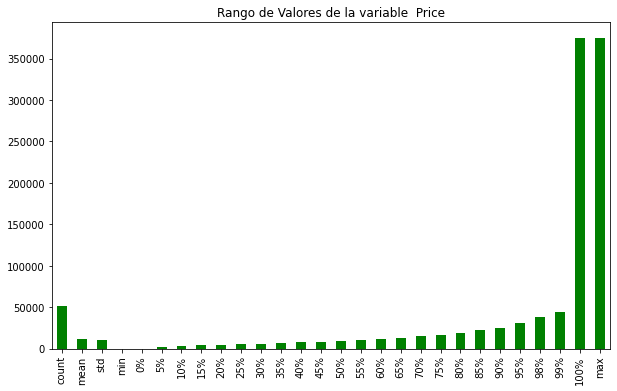

In [6]:
#examinar la columna para observar de manera general la información que almacena
#para verifcar si no hay datos problemáticos.
datos_price = venta_vehiculos["price"].describe(percentiles=list(np.linspace(0, 1, 21)) + [0.98, 0.99])
datos_price.plot(kind = 'bar', figsize=(10, 6), 
                 title = 'Rango de Valores de la variable  Price',
                color ='green')

Los valores de la columna 'price' se ven bien. Podemos seguir revisando más columnas.

Tenemos en la columna 'price', 798 registros con valor de venta de 1. Son datos inapropiados.

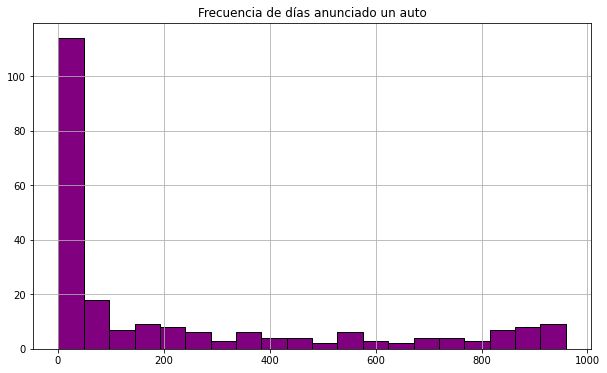

In [7]:
#verifiquemos los datos de la columna days_listed
venta_vehiculos['days_listed'].sort_values(ascending=True).value_counts().hist(bins=20, figsize=(10, 6), color="purple", edgecolor='black' )
plt.title('Frecuencia de días anunciado un auto')
plt.show()

Hay muchos valores cercanos al cero, se estudirán posibles datos atípicos. En la sección 10.

In [8]:
#Verificar si existen  valores auscentes
venta_vehiculos.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Tenemos valores auscentes en las columnas model_year, cylinders, odometer, paint_color y is_4wd.

In [9]:
#Verificar si hay valores duplicados
venta_vehiculos.duplicated().sum()

0

No se tienen registros duplicados.

<a id='indice23'></a>
## Conclusiones y siguientes pasos
Tenemos 12 columnas con 51525 registros.
Existen 5 columnas con los datos inapropiados para las variables que representan.
Hay 5 columnas con valores auscentes.
Existe en la columna price registrado un autos con precio de 1 y son 798.
No tenemos valores duplicados.

Las columna model_year, cylinders y is_4wd se tramitarán para ser de tipo de dato entero.
La columna is_4wd se cambirá su tipo de datos a booleano.
La columna  'date_posted'y 'days_listed' a tipo de dato fecha.

Se examinará los registros de price con valor problemático para determinar si es posible sustituirlos ó eliminarlos ó poderar la razón para tener el valor de 1.

Se estudiará si los valores ausentes son significativamente importantes con respecto a al total de registros mediante exámenes de sus porcentajes. Para poder tomar una desción referente a su origen, ya seá para seleccionar valores que los sustituirán ó eliminarlos si se depura y no altera las propiedades de estadisticas del DataFrame.









<a id='indice3'></a>
# Tratar los valores ausentes 

Estudiarmos los valores ausentes para cada columna con más detalle y decidiremos qué hacer con ellos basándose en la estructura dentro del DataFrame y la información que sustentarián.

In [10]:
#investigar los datos que son nulos en la columna model_year
model_year_nulls = venta_vehiculos.loc[
    venta_vehiculos['model_year'].isna() == True]
#ahora observar los datos ausentes en este filtro
model_year_nulls.isnull().sum()

price              0
model_year      3619
model              0
condition          0
cylinders        363
fuel               0
odometer         549
transmission       0
type               0
paint_color      652
is_4wd          1811
date_posted        0
days_listed        0
dtype: int64

Como el modelo de un auto tiene fuerte relación con las columnas 'model' y 'odometer'; esto se afirma por el  juicio de que, dados de que se puede precisar con el modelo y el kilometraje de un auto, el estimado del año en que salio a la  venta el auto. 

Podemos usar la información de los datos que se encontrarón arriba, para buscar anuncios con los datos completos fijos de modelo, odometro y año del modelo para por medio de un estadístico en la columna model_year de los datos completos, un valor para imputarlo en la columna de model_year de nuestro datos ausentes. Aunque existe el problema de que como se ve en la tabla anterior hay registros sin datos en la columna model_year que tampoco tienen datos en la columna de 'odometer'; por lo consiguiente :

Es usaremos es necesario en primera instancia completar los datos ausentes en la columna odometer.

Para que posteriormente usar a una muestra de los datos que esten completos en las columnas de odometer y model, para estimar por busqueda en los registros completos, que datos pueden ser imputados en los valores de las columna model_year que esten vacias. 

Vamos a categorizar la columna price previamente.
Para usarla como auxiliar en caso de no podamos determinar un estadístico para imputar los datos en model_year. Con el precio, el tipo y la variable odometer se puede también estimar la variable model_year.

In [11]:
venta_vehiculos['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [13]:
#vamos a categorizar la columna de 'price'
#definimos la función para implantar las categorias de la columna 'price'
def jerarquia_precio(dato):
    if dato <= 1000:
        return 'hasta $1,000'
    if dato <= 5000:
        return 'hasta $5,000'
    if dato <= 9000:
        return 'hasta $9,000'
    if dato <= 10000:
        return 'hasta $10,000'
    if dato <= 13000:
        return 'hasta $13,000'
    if dato <= 20000:
        return 'hasta $20,000'
    if dato <= 50000:
        return 'hasta $50,000'
    if dato <= 100000:
        return 'hasta $100,000'
    else:
        return 'mas de $100,000'   
    
#asignamos categorias al dataframe de anclaje                                                                               
venta_vehiculos['cat_precio'] = venta_vehiculos['price'].agg(jerarquia_precio)
venta_vehiculos['cat_precio'].describe()                                                                       

count            51525
unique               9
top       hasta $9,000
freq             12651
Name: cat_precio, dtype: object

Con la columna cat_price categorizamos los precios de cada registro. La siguiente tabal dinámica permite hacer un exámen  de busqueda por precio, año del auto y condición del vehículo para estimar millaje. 

In [14]:
# hacemos la tabla dinámica para la opción de no tener dato en la columna 'cat_price'

examen_precio = venta_vehiculos.pivot_table(index= ['cat_precio','condition'], 
                                      values=['model_year', 'odometer', 'price'], 
                                      aggfunc= 'median')

examen_precio.sort_values(by='odometer', ascending=True) 

model_year  odometer     price
cat_precio      condition                                
hasta $100,000  new            2018.0       7.0   56504.0
mas de $100,000 new               NaN      35.0  109999.0
hasta $50,000   new            2018.0      78.0   34000.0
hasta $1,000    new            2018.0    7500.0      12.0
hasta $100,000  excellent      2018.0   11203.0   55000.0
hasta $20,000   new            2018.0   20000.0   16499.0
hasta $100,000  like new       2018.0   23000.0   55000.0
                good           2017.0   28000.0   53986.0
hasta $50,000   salvage        2017.0   29328.0   20750.0
hasta $1,000    like new       2015.0   36147.0     299.0
hasta $50,000   like new       2016.0   39000.0   27999.0
hasta $1,000    excellent      2016.0   41512.0       1.0
hasta $10,000   new            2014.0   49573.5    9700.0
hasta $50,000   good           2015.0   51086.0   25300.0
hasta $10,000   salvage        2014.0   54000.0    9900.0
hasta $20,000   salvage        2014.5   56000.0   14500.0
hasta $13,000   salvage        2014.0   60450.0   11950.0
                new            2016.0   62978.0   12150.0
hasta $20,000   like new       2015.0   65000.0   16500.0
hasta $50,000   excellent      2015.0   65957.0   26985.0
hasta $13,000   like new       2013.0   74000.0   11950.0
hasta $50,000   fair           2012.0   76863.0   22000.0
hasta $10,000   like new       2013.0   79000.0    9900.0
hasta $9,000    salvage        2009.0   81586.0    7000.0
hasta $20,000   excellent      2013.0   93036.0   15998.0
                fair           2012.0  100479.5   15500.0
                good           2012.0  101311.0   16500.0
hasta $13,000   excellent      2012.0  102300.0   11900.0
hasta $10,000   excellent      2012.0  105967.0    9950.0
hasta $9,000    like new       2011.0  108552.0    6999.0
                new            2012.0  117000.0    7500.0
hasta $13,000   fair           2008.0  118902.5   11650.0
hasta $10,000   good           2010.0  120738.0    9950.0
hasta $9,000    excellent      2010.0  121000.0    6999.0
hasta $13,000   good           2011.0  121266.0   11900.0
hasta $5,000    like new       2008.0  129000.0    3572.5
hasta $9,000    good           2008.0  136500.0    6967.0
mas de $100,000 like new       2008.0  140000.0  145000.0
hasta $5,000    salvage        2005.0  142673.5    2700.0
                new            2005.5  148000.0    3995.0
                excellent      2006.0  149000.0    3995.0
mas de $100,000 good           2012.0  151248.0  189000.0
hasta $5,000    good           2005.0  163912.0    3670.0
hasta $9,000    fair           2006.0  169930.0    6500.0
hasta $1,000    good           2002.0  172226.0     750.0
hasta $5,000    fair           2002.0  181113.0    2500.0
hasta $1,000    salvage        2001.0  189388.0     800.0
                fair           2001.0  199912.0     800.0
hasta $10,000   fair           2008.0  213615.0    9750.0
mas de $100,000 excellent      2015.0       NaN  300000.0
                fair           2005.0       NaN  123456.0

Para hacer mas precisa la estimación de que dato debe ir en la columna model_year agruparemos los registros con datos completos por lasvariables combinadas como 'price', 'model', 'condition' y 'type'.  

In [15]:
#vamos a categorizar la columna de 'odometer'
filtro_sin_nulls = venta_vehiculos.loc[(venta_vehiculos['odometer'].isna() == False ) &
                                       (venta_vehiculos['model_year'].isna() == False)].groupby( by =['model', 'type', 'condition', 'model_year'])
filtro_sin_nulls = filtro_sin_nulls.median()

#definimos la función para implantar las categorias de la columna 'odometer'
def jerarquia_km(dato):
    if dato < 39000:
        return 'menos de 39000 km'
    if dato < 54000:
        return 'menos de 54000 km'
    if dato < 69000:
        return 'menos de 69000 km'
    if dato < 84000:
        return 'menos de 84000 km'
    if dato < 99000:
        return 'menos de 99000 km'
    if dato < 114000:
        return 'menos de 114000 km'
    if dato < 129000:
        return 'menos de 129000 km'
    if dato < 144000:
        return 'menos de 144000 km'
    else:
        return 'alto uso de kilometraje' 
#asignamos las categorias al dataframe de anclaje                                                                               
filtro_sin_nulls['cat_km'] = filtro_sin_nulls['odometer'].agg(jerarquia_km)
filtro_sin_nulls                                                                       

price  cylinders  odometer  \
model             type  condition model_year                                
acura tl          SUV   good      2007.0      4950.0        6.0  127000.0   
                  other excellent 2004.0      3700.0        6.0  173454.0   
                        good      2008.0      5490.0        NaN  165738.0   
                  sedan excellent 2001.0      2300.0        6.0  251800.0   
                                  2003.0      4293.5        6.0  121000.0   
...                                              ...        ...       ...   
volkswagen passat wagon good      2005.0      3839.0        4.0  110500.0   
                                  2007.0      3100.0        4.0  155500.0   
                        like new  2008.0      3999.0        4.0  132428.0   
                                  2010.0      3999.0        4.0  139785.0   
                        salvage   2000.0       800.0        6.0  221000.0   

                                              is_4wd  days_listed  \
model             type  condition model_year                        
acura tl          SUV   good      2007.0         NaN         31.0   
                  other excellent 2004.0         NaN         11.0   
                        good      2008.0         NaN         12.0   
                  sedan excellent 2001.0         NaN        141.0   
                                  2003.0         NaN         31.0   
...                                              ...          ...   
volkswagen passat wagon good      2005.0         1.0         37.5   
                                  2007.0         NaN         14.5   
                        like new  2008.0         NaN         46.0   
                                  2010.0         NaN         17.0   
                        salvage   2000.0         NaN         28.0   

                                                               cat_km  
model             type  condition model_year                           
acura tl          SUV   good      2007.0           menos de 129000 km  
                  other excellent 2004.0      alto uso de kilometraje  
                        good      2008.0      alto uso de kilometraje  
                  sedan excellent 2001.0      alto uso de kilometraje  
                                  2003.0           menos de 129000 km  
...                                                               ...  
volkswagen passat wagon good      2005.0           menos de 114000 km  
                                  2007.0      alto uso de kilometraje  
                        like new  2008.0           menos de 144000 km  
                                  2010.0           menos de 144000 km  
                        salvage   2000.0      alto uso de kilometraje  

[8024 rows x 6 columns]

Para las búsquedas en que los registros que no tienen valores en las columnas odometer, cylinders, model y tipo, realizamos una búsqueda con la tabla  siguiente, usando la información en modelo y año.

In [16]:
# hacemos la tabla dinámica para la opción de no tener dato en la columna 'odometer'

examen = venta_vehiculos.pivot_table(index=['model', 'type'], 
                                      values=['cylinders', 'price', 'model_year'], aggfunc= 'median')

examen

cylinders  model_year   price
model             type                                    
acura tl          SUV              6.0      2007.0  4950.0
                  other            6.0      2006.0  4595.0
                  sedan            6.0      2007.0  5950.0
bmw x5            SUV              6.0      2010.0  9925.0
                  hatchback        6.0      2001.0  6000.0
...                                ...         ...     ...
volkswagen passat coupe            4.0      2014.0  9900.0
                  hatchback        4.0      2007.0  3500.0
                  other            4.0      2014.0  8950.0
                  sedan            4.0      2013.0  8950.0
                  wagon            4.0      2007.0  3650.0

[477 rows x 3 columns]

Podemos estimar con los datos que estan completos los datos vacios en la variable cylinders. Podemos hacer una tabla auxiliar usando los registros con datos completos en cylinders, agrupamos por modelo y modelo_año.

In [17]:
#tabla dinámica para imputar los datos de la ausentes en cylinders
#en caso de el registro a imputar no contenga información en las columnas
#cylinders, model y tipo 
model_year_bien = venta_vehiculos.loc[venta_vehiculos['cylinders'].isna() == False ].groupby(['model', 'model_year'])
model_year_bien = model_year_bien[['model', 'model_year', 'cylinders']].median()
model_year_bien

model_year  cylinders
model             model_year                       
acura tl          1999.0          1999.0        6.0
                  2001.0          2001.0        6.0
                  2002.0          2002.0        6.0
                  2003.0          2003.0        6.0
                  2004.0          2004.0        6.0
...                                  ...        ...
volkswagen passat 2014.0          2014.0        4.0
                  2015.0          2015.0        4.0
                  2016.0          2016.0        4.0
                  2017.0          2017.0        4.0
                  2018.0          2018.0        4.0

[2202 rows x 2 columns]

Tenemos suficiente información ahora vamos a realizar la siguiente estrategia: Se usarán los datos de las columnas 'model' y 'type' para intentar inferir con esos datos los datos ausentes de la columna de 'cylinders'.

In [18]:
# Escribamos una función para llenar la columna 'cylinders'
def poner_cilindrada(registro):
    if pd.isna(registro['cylinders']):
        if pd.isna(examen ['cylinders'][registro['model']][registro['type']]):
            return model_year_bien ['cylinders'][registro['model']] [registro['model_year']]
        else:
            return examen ['cylinders'][registro['model']][registro['type']]
    return registro['cylinders']  
# ponemos la imputación para los datos ausentes en la columna 'cylinders'
venta_vehiculos['cylinders'] = venta_vehiculos.apply(poner_cilindrada, axis= 1)
# verificamos que no haya mas valores ausentes en la columna 'cylinders'
venta_vehiculos['cylinders'].isnull().sum() 
#llenarlos a mano / eliminar de la tabla pivot type y asi eliminamos los 15

0

Ahora vamos a intentar usar la información completa en las columnas 'model', 'type' y 'condition' para imputar los datos en 'odometer' y 'model_year'.

In [19]:
#definimos la función para llenar los valores ausentes de 'odometros'
def encuentra_km(renglon):
    if pd.isna(renglon['odometer']):
        try:
            return filtro_sin_nulls ['odometer'][renglon['model']][renglon['type']][renglon['condition']][renglon['model_year']]
        except:
            return examen_precio ['odometer'][renglon['cat_precio']][renglon['condition']]
    return renglon['odometer']       

In [20]:
#se ajustan los valores ausentes de la columan 'model_year'
venta_vehiculos['odometer'] = venta_vehiculos.apply(encuentra_km, axis= 1,)
# verificamos que no haya mas valores ausentes en la columna 'cylinders'
venta_vehiculos['odometer'].isnull().sum()

0

Ahora que tenemos datos completos podemos usar las columnas odometer y model para imputar la variable model_year.

In [21]:
# hacemos la tabla dinámica para buscar dato en la columna 'model_year'

filtro_sin_nulls2 = venta_vehiculos.loc[venta_vehiculos['model_year'].isna() == False].groupby( 
    by =['model', 'type', 'condition']).median()
filtro_sin_nulls2

price  model_year  cylinders  odometer  \
model             type  condition                                            
acura tl          SUV   good       4950.0      2007.0        6.0  127000.0   
                  other excellent  3700.0      2004.0        6.0  173454.0   
                        good       5490.0      2008.0        6.0  165738.0   
                  sedan excellent  7900.0      2009.0        6.0  122072.0   
                        fair       2500.0      2004.0        6.0  212000.0   
...                                   ...         ...        ...       ...   
volkswagen passat wagon excellent  3750.0      2007.0        4.0  145000.0   
                        fair        750.0      2007.0        4.0  229000.0   
                        good       3400.0      2004.0        4.0  135396.0   
                        like new   3999.0      2008.0        4.0  132428.0   
                        salvage     800.0      2000.0        6.0  221000.0   

                                   is_4wd  days_listed  
model             type  condition                       
acura tl          SUV   good          NaN         47.0  
                  other excellent     NaN         11.0  
                        good          NaN         12.0  
                  sedan excellent     1.0         30.0  
                        fair          NaN         28.0  
...                                   ...          ...  
volkswagen passat wagon excellent     1.0         15.5  
                        fair          NaN         94.0  
                        good          1.0         23.0  
                        like new      NaN         32.5  
                        salvage       NaN         28.0  

[1235 rows x 6 columns]

Realizamos una tabla auxiliar para la imputación de los registros sin  datos en equivalentes en las type, model, condition de la tabla anterior, entonces buscamos por modelo y la variable con la que categorizamos precio , cat_precio.

In [22]:
# hacemos la tabla dinámica para la opción de no tener datos equivalentes 
# para imputar en la columna 'model_year' en la tabla anterior filtro_sin_nulls2

examen_precio2 = venta_vehiculos.pivot_table(index= ['model',  'cat_precio'], 
                                      values=['model_year', 'odometer', 'price'], 
                                      aggfunc= 'median')

examen_precio2.sort_values(by='odometer', ascending=True) 

,,model_year,odometer,price
model,cat_precio,,,
chevrolet corvette,"mas de $100,000",NaN,35.0,109999.0
nissan altima,"hasta $50,000",2018.5,677.0,23988.0
chevrolet tahoe,"hasta $1,000",2018.0,1003.0,1.0
chevrolet silverado 3500hd,"hasta $100,000",2018.0,1399.0,58500.0
chevrolet corvette,"hasta $100,000",2013.0,3500.0,58995.0
...,...,...,...,...
toyota tundra,"hasta $5,000",2001.0,224000.0,3800.0
ford f-250 super duty,"mas de $100,000",2012.0,225000.0,115000.0
jeep cherokee,"hasta $100,000",1992.0,225000.0,64999.0


In [23]:
#definimos la función para llenar los valores ausentes de 'model_year'
def encuentra_años(renglon):
    if pd.isna(renglon['model_year']):
        try:
            return filtro_sin_nulls2 ['model_year'][renglon['model']][renglon['type']][renglon['condition']]
        except:
            return examen_precio2 ['model_year'][renglon['model']][renglon['cat_precio']]
    return renglon['model_year']
# ponemos la imputación paro los datos ausentes en la columna 'model_year'
venta_vehiculos['model_year'] = venta_vehiculos.apply(encuentra_años, axis= 1)
# verificamos que no haya mas valores ausentes en la columna 'model_year'
venta_vehiculos['model_year'].isnull().sum()

0

Ahora vamos a imputar los valores ausentes de la columna 'paint_color', con un valor que se considerá como 'the customer chooses the color'

In [24]:
#se imputa los valores ausentes con la etiqueta 'the customer chooses the color' en la 
#columna de 'paint_color'
venta_vehiculos['paint_color'] = venta_vehiculos['paint_color'].fillna(value='the customer chooses the color')
# verificamos que no haya mas valores ausentes en la columna 'paint_color'
venta_vehiculos['paint_color'].isnull().sum()

0

Vamos a verificar que no existan datos ausentes en el dataFrame.

In [25]:
#Verificar si existen  valores auscentes
venta_vehiculos.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
cat_precio          0
dtype: int64

Podemos continuar ahora verificando los tipos de datos en cada columna. 

<a id='indice4'></a>
# Corregir los tipos de datos

Vamos a corregir los tipos de datos de las columnas: 'model_year' a dato entero, 'is_4wd' a booleano, 'date_posted' a ser objeto tipo fecha.

In [26]:
#Corregir los tipos de datos de las columnas como sigue...
#model_year', 'cylinders', 'is_4wd', 'date_posted', 'days_listed'.
venta_vehiculos['model_year'] = venta_vehiculos['model_year'].astype('int')
venta_vehiculos['cylinders'] = venta_vehiculos['cylinders'].astype('int')
venta_vehiculos['is_4wd'] = venta_vehiculos['is_4wd'].astype('bool')
venta_vehiculos['date_posted']=pd.to_datetime(venta_vehiculos['date_posted'], format='%Y-%m-%d')
#Ahora verificamos que se hayan hecho los cambios correspondientes en la información
#de nuestro dataFrame base
venta_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  cat_precio    51525 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 5.2+ MB


<a id='indice5'></a>
# Enriquecer datos

Agregando factores adicionales a los datos para facilitar el análisis:

- `mes_anuncio`-mes en el que el anuncio se colocó.
- `dia_semana_anuncio`- día de la semana en el que el anuncio se colocó.
- `año_anuncio`- año en el que el anuncio se colocó.
- `año_vehiculo_anuncio`- los años del vehículo cuando el anuncio se colocó. 
- `millaje_promedio`- La media de millaje del vehículo por año.

Es importante sementar la información de la fecha del anuncio para tener una forma mas diestra de confrontar datos como si influye en el precio los días en que salen a venta, ó el año con referencia al año del modelo, no lo podemos saber, aunque es buena practica tener esos datos en el mismo dataframe. Por otra parte el tener un promedio con la nueva columna de 'millaje_promedio' se segmenta la variable 'odometer' para facilitar el análisis sobre esta variable.

In [27]:
# Agregar valores de fecha y hora para cuando se colocó el anuncio
#Día de la semana, mes y año en el que el anuncio se colocó
venta_vehiculos['mes_anuncio'] =  pd.DatetimeIndex(venta_vehiculos['date_posted']).month 
venta_vehiculos['dia_semana_anuncio']=  pd.DatetimeIndex(venta_vehiculos['date_posted']).weekday
venta_vehiculos['año_anuncio']= pd.DatetimeIndex(venta_vehiculos['date_posted']).year

Vamos a comprobar que no se encuentren datos problemáticos en las nuevas columnas.

In [28]:
#verificando los valores de la variable 'mes_anuncio'
venta_vehiculos['mes_anuncio'].value_counts()

10    4643
12    4564
3     4559
5     4503
8     4480
7     4471
1     4452
9     4452
11    4354
6     4216
2     4014
4     2817
Name: mes_anuncio, dtype: int64

In [29]:
#verificando los valores de la variable 'dia_semana_anuncio'
venta_vehiculos['dia_semana_anuncio'].value_counts()

3    7510
5    7392
6    7356
0    7339
4    7334
2    7299
1    7295
Name: dia_semana_anuncio, dtype: int64

In [30]:
#verificando los valores de la variable 'año_anuncio'
venta_vehiculos['año_anuncio'].value_counts()

2018    35683
2019    15842
Name: año_anuncio, dtype: int64

In [31]:
# Agregar los años del vehículo cuando el anuncio se colocó
venta_vehiculos['año_vehiculo_anuncio']= venta_vehiculos['año_anuncio'] - venta_vehiculos['model_year']
venta_vehiculos['año_vehiculo_anuncio'].describe()

count    51525.000000
mean         8.523590
std          6.153713
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: año_vehiculo_anuncio, dtype: float64

In [32]:
# Agregar el millaje promedio del vehículo por año
#definimos una funcion para el correcto llenado de la columna 'millaje_promedio'
def inmputar_millaje(renglon):
    if renglon['año_vehiculo_anuncio'] != 0:
        return  renglon['odometer'] / renglon['año_vehiculo_anuncio']
    return 0
venta_vehiculos['millaje_promedio']= venta_vehiculos.apply(inmputar_millaje, axis= 1)
venta_vehiculos['millaje_promedio'].describe()

count     51525.000000
mean      16949.079250
std       12774.703212
min           0.000000
25%       10083.466667
50%       14625.000000
75%       20766.333333
max      279365.000000
Name: millaje_promedio, dtype: float64

Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

In [33]:
# función para realizar implementar las categorías en la columna 'condition'
def jerarquiza_condition(columna):
    if columna == 'new':
        return  5
    if columna == 'like new':
        return 4 
    if columna == 'excellent':
        return 3 
    if columna == 'good':
        return 2
    if columna == 'fair':
        return 1
    if columna == 'salvage':
        return 0
# creamos la columna 'cat_condition' para determinar que nuestra función la impronte de datos con los
#de la columna 'condition'
venta_vehiculos['cat_condition'] = venta_vehiculos['condition'].agg(jerarquiza_condition)
venta_vehiculos['cat_condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: cat_condition, dtype: int64

<a id='indice6'></a>
# Comprobar datos limpios.

Dado que los datos están listos para el análisis, será útil ver qué es exactamente lo que tenemos de contenido en los registros. Nos referimos a la posibilidad de encontrarnos con datos problemáticos y  datos atípicos.

Observemos como se encuentra en este momento el DataFrame. Para delinear un procedimiento para esta etapa.

In [34]:
# imprime la información general/resumida sobre el DataFrame
venta_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  int64         
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  object        
 4   cylinders             51525 non-null  int64         
 5   fuel                  51525 non-null  object        
 6   odometer              51525 non-null  float64       
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   paint_color           51525 non-null  object        
 10  is_4wd                51525 non-null  bool          
 11  date_posted           51525 non-null  datetime64[ns]
 12  days_listed           51525 non-null  int64         
 13  cat_precio      

Obsevando la información actualizada que se presenta arriba: Podemos tratar de observar que columnas estan realacionadas con la columna 'price'.
Desde la conducta de un comprador buscara un tipo de vehículo y año de un modelo, dependiendo de su busqueda filtrará sus datos por un rango de precio.
Desde la condición de una persona que vende, buscará los tipos de vehículos que son del año y del tipo de vehículo que pretende vender, para llenar su registro pondrán expecial atención en la captura de la variable condition, dependiendo de la busqueda que el observe compara su auto con los demás del registro y hace su captura de la variable price.

Está dinámica, nos permite inferir que entre las variable price, model_year, millaje, tipo junto con la variable condition, denotan influencia en lo que se haya capturado para la variable price.

Vamos a proceder a limpiar datos atípicos y problemáticos de la variable price.

In [35]:
# imprimiendo una muestra de datos de variable 'price'
venta_vehiculos['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Con la información anterior podemos calcular el rango quartilíco para determinar los valores que son típicos. Teniendo este rango la teoría nos dice que excluimos los valores estadísicamente atípicos.

In [36]:
#calculando los valores mínimo y máximo de los valores óptimos
Q1 = venta_vehiculos['price'].quantile(0.25)
Q3 = venta_vehiculos['price'].quantile(0.75)
IQR = Q3 - Q1
print("PRIMER QUARTILE:   ", Q1)
print("TERCER QUARTILE:  ", Q3)
print("RANGO INTERCUÁTIL:", IQR)
lim_max_price = Q3 + 1.5*IQR
lim_min_price = Q1 - 1.5*IQR
print("LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE price: ", lim_max_price)
print("LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE price:", lim_min_price)

PRIMER QUARTILE:    5000.0
TERCER QUARTILE:   16839.0
RANGO INTERCUÁTIL: 11839.0
LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE price:  34597.5
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE price: -12758.5


Se observar desde la descripción de los datos que ampara la variable price, entonces vemos que exiten valores atípicos y problemáticos como modelos con precio igual a 1.
Vamos a conseguir limpiar los datos usando el cálculo del rango intercuátil en las variables que observemos valores problemáticos. Para esto vamos definir una función que nos permitirá simplificar el código y automatizar el cálculo.

In [37]:
#definimos una función para calcular quartiles
def calcula_quartiles(columna, tabla):
    Q1 = tabla[columna].quantile(0.25)
    Q3 = tabla[columna].quantile(0.75)
    IQR = Q3 - Q1
    print("PRIMER QUARTILE:  ", Q1)
    print("TERCER QUARTILE:  ", Q3)
    print("RANGO INTERCUÁTIL:", IQR)
    lim_max = Q3 + 1.5*IQR
    lim_min = Q1 - 1.5*IQR
    print("LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE ", columna, ": ", lim_max)
    print("LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE ", columna, ": ", lim_min)
    return [lim_min, lim_max]

Tenemos el intervalo teórico, de datos típicos (-12758.5, 34597.5), pero un auto de un precio de 1 incluso un valor de cero, carece de sentido, es necesario observar estos datos.

In [38]:
#examinando los valores de la variable price , menores cero.
negativos = venta_vehiculos.loc[venta_vehiculos['price'] < 0]
negativos['price'].value_counts

<bound method IndexOpsMixin.value_counts of Series([], Name: price, dtype: int64)>

Como lo que se puede pretender de un auto es muy ligado con la variable model_year, tratemos de identificar el rango de la variable.

In [39]:
#Valorando los valores unicos de la columna 'model_year'
venta_vehiculos['model_year'].sort_values(ascending=True).unique()

array([1908, 1929, 1936, 1948, 1949, 1954, 1955, 1958, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [40]:
#examinando los valores que se encuentran en la variable price
price_problema = venta_vehiculos[venta_vehiculos['price'] < 700].groupby('model_year')
price_problema['model_year'].count()

model_year
1966      1
1978      2
1986      1
1988      1
1990      2
1991      1
1992      1
1993      6
1994      1
1995      3
1996      8
1997      7
1998      9
1999     10
2000     10
2001     10
2002      8
2003     25
2004     27
2005     12
2006     21
2007     32
2008     11
2009     14
2010     24
2011     28
2012     42
2013     41
2014     98
2015    106
2016    125
2017    145
2018    298
2019     59
Name: model_year, dtype: int64

Conociendo el año del auto, podemos estimar el precio. Hagamos una tabla que nos permita 
ir categorizando los precios por año del modelo.

In [41]:
#vamos examinar los valores de price que consideramos correctos
venta_vehiculos['model_group'] = pd.cut(venta_vehiculos['model_year'], 
                                        bins=[1900, 1909, 1910, 1919, 1920, 1929, 1930, 1939, 
                                              1940, 1949, 1950, 1959, 1960, 1969, 
                                              1970, 1979, 1980, 1989, 1990, 1999, 2000, 2009, 2010, 2019])
price_correctos = venta_vehiculos[venta_vehiculos['price'] >= 700].groupby('model_group')['price'].agg(['median', 'count'])
price_correctos

,median,count
model_group,,
"(1900, 1909]",12995.0,2
"(1909, 1910]",NaN,0
"(1910, 1919]",NaN,0
"(1919, 1920]",NaN,0
"(1920, 1929]",18000.0,1
"(1929, 1930]",NaN,0
"(1930, 1939]",5000.0,1
"(1939, 1940]",NaN,0
"(1940, 1949]",32950.0,2


Examinando los rangos de arriba, no tendremos problemas para poder imputar con la tabla anterior, los valores problemáticos de la columna 'price'.Filtremos los valores problemáticos de la columna price.

In [42]:
#refrescando los valores que se encuentran en la variable price con valores problemáticos para
#que tengan la columna 'model_group'
price_problema = venta_vehiculos[venta_vehiculos['price'] < 700].groupby('model_year')

Ahora que definimos que los valores problemáticos de la variable price, por medio de una función, se  realiza una redefinición de los valores problemáticos usando la tabla de categoriza a la variable model_year. En el registro que tiene un precio menor a 700 se busca el valor que tenga en model_year y se encuentra en una de las categorias de nuestra tabla vista anteriormente, ubicado en que categoría de año se encuentra, pasa a imputarle al registro problemático un estadístico de tipo media de la variable price, que se presenta inmediatamente en la tabla que costruimos con la columna model_group.

In [43]:
#imputación de los valores problemáticos de la variable price
#definimos la función para poder realizar la imputación
def arreglo_price(renglon):
    if renglon['price'] < 700:
        return price_correctos['median'][renglon['model_group']]
    return renglon['price']
venta_vehiculos['price'] = venta_vehiculos.apply(arreglo_price, axis= 1)
#refrescando los valores que se encuentran en la variable price con valores problemáticos
price_problema = venta_vehiculos[venta_vehiculos['price'] < 700].groupby('model_year')
price_problema['model_year'].count()

Series([], Name: model_year, dtype: int64)

In [44]:
#Ahora examinemos la distribución de la variable price
venta_vehiculos['price'].describe()

count     51525.000000
mean      12430.607045
std        9886.756194
min         700.000000
25%        5500.000000
50%        9799.000000
75%       16846.000000
max      375000.000000
Name: price, dtype: float64

Calculando los quartiles para la columna price, siguiendo la distribución anterior. Sin los datos problemáticos que teníamos anteriormente como modelos con precio de igual a 1.

In [45]:
#calculo de los limites teóricos con quartiles para la variable price
[lim_min_price , lim_max_price]= calcula_quartiles('price',venta_vehiculos )

PRIMER QUARTILE:   5500.0
TERCER QUARTILE:   16846.0
RANGO INTERCUÁTIL: 11346.0
LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE  price :  33865.0
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE  price :  -11519.0


Recordando que imputamos datos problemáticos para la columna 'price' si son menores a 700.

In [46]:
#Establecemos limites para valores tipicos en la variable price sin datos raros
lim_min_price = 700
print("LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE price: ", lim_max_price)
print("LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE price: ", lim_min_price)

LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE price:  33865.0
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE price:  700


In [47]:
# imprimiendo una muestra de datos de la variable 'odometer'
venta_vehiculos['odometer'].describe()

count     51525.000000
mean     115374.115934
std       63280.505510
min           0.000000
25%       71074.000000
50%      113419.000000
75%      153835.000000
max      990000.000000
Name: odometer, dtype: float64

Con la información anterior podemos calcular el rango quartilíco para determinar los valores que son típicos.Usando los límites del rango expulsamos los valores atípicos.

In [48]:
#calculo de los limites teó,ricos con quartiles para la variable odometer
[lim_min_odo , lim_max_odo]= calcula_quartiles('odometer', venta_vehiculos)

PRIMER QUARTILE:   71074.0
TERCER QUARTILE:   153835.0
RANGO INTERCUÁTIL: 82761.0
LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE  odometer :  277976.5
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE  odometer :  -53067.5


En el limite inferior vemos que alcanza valores negativos para la variable odometer, los cual no tiene sentido para un vehículo. Es necesario hacer un revista de estos valores problemáticos.

In [49]:
#designemos un filtro para los valores problemáticos de la variable odometer
problema_odometer = venta_vehiculos.loc[venta_vehiculos['odometer'] < 0]
problema_odometer['odometer'].value_counts()

Series([], Name: odometer, dtype: int64)

In [50]:
# por lo anteror podemos redefinir el limite inferor para valores rezonables 
lim_min_odo = 0
print("LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE odometer:", lim_max_odo)
print("LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE odometer:", lim_min_odo)

LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE odometer: 277976.5
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE odometer: 0


In [51]:
# imprimiendo una muestra de datos de la variable 'cylinders'
venta_vehiculos['cylinders'].describe()

count    51525.000000
mean         6.121921
std          1.657534
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Con la información anterior podemos calcular el rango quartilíco para determinar los valores que son típicos. de la misma manera que con la variable anterior usamos este rango para definir límites de aceptación de valores consitentes dentro de la columna cylinders.

In [52]:
#calculo de los limites teóricos con quartiles para la variable cylinders
[lim_min_cyl , lim_max_cyl]= calcula_quartiles('cylinders', venta_vehiculos)

PRIMER QUARTILE:   4.0
TERCER QUARTILE:   8.0
RANGO INTERCUÁTIL: 4.0
LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE  cylinders :  14.0
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE  cylinders :  -2.0


Con el mismo criterio anterior precidimos del nivel teórico del limite inferior y lo redefinimos a cero. Para obtener un rango de valores consistentes.

In [53]:
lim_min_cyl = 0
print("LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE cylinders:", lim_max_cyl)
print("LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE cylinders:", lim_min_cyl)

LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE cylinders: 14.0
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE cylinders: 0


In [54]:
# imprimiendo una muestra de datos de la variable 'condition'
venta_vehiculos['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

Con la información anterior podemos calcular el rango quartilíco para determinar los valores que son típicos. Y así evitar datos atípicos.

In [55]:
#calculo de los limites teóricos con quartiles para la variable cylinders
[lim_min_condi , lim_max_condi]= calcula_quartiles('cat_condition', venta_vehiculos)

PRIMER QUARTILE:   2.0
TERCER QUARTILE:   3.0
RANGO INTERCUÁTIL: 1.0
LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE  cat_condition :  4.5
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE  cat_condition :  0.5


<a id='indice7'></a>
# Estudiar parámetros principales

Estudiarmos los siguientes parámetros: precio, años del vehículo cuando se colocó el anuncio, millaje, número de cilindrada y condición. Trazaremos histogramas para cada uno de los parámetros. Buscando si hay  valores atípicos; también verificando si estos, afectan a la forma y legitimidad de los histogramas en cada variable.

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Si una persona que busca hacer una compra y observa un anuncio y si considera el millaje alto comparando el año del vehiculo considera buscar otra opción del mismo año del vehiculo pero con un millaje inferior al que encontro por primera vista. Si un vendedor observa que su vehiculo se le contacta por varios compradores y le indican facilidades para probar el vehículo ofrecido, pensará el vendedor en buscar destacar en el apartado de estado que se encuentre en un estado venefíco para los compradores.

Respecto al precio el cilindraje 4 es menos apreciado para ciertos compradores que un cilindraje de 8, lo que motiva al vendedor a incrementar un precio a un auto con 4 cilindros.

Con esta dinámica tomada encuenta podemos indicar que será interesante observar la influencia de los variables del estado del vehículo , el millaje, el año del modelo (años del vehículo cuando el anuncio se colocó) y el precio.

(-1000.0, 150000.0)

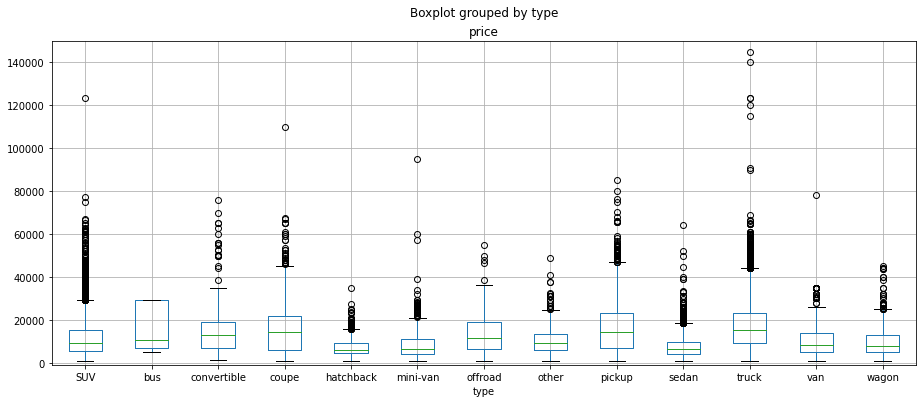

In [56]:
#examinemos las variable de price vs type
venta_vehiculos.boxplot(column= 'price', by ='type', figsize=(15, 6))
plt.ylim(-1000, 150000)

En la variable type para el valor 'truck' exiten muchos valores que pueden considerarse valores atípicos. 

In [57]:
#examinemos la variable de price
venta_vehiculos['price'].describe()

count     51525.000000
mean      12430.607045
std        9886.756194
min         700.000000
25%        5500.000000
50%        9799.000000
75%       16846.000000
max      375000.000000
Name: price, dtype: float64

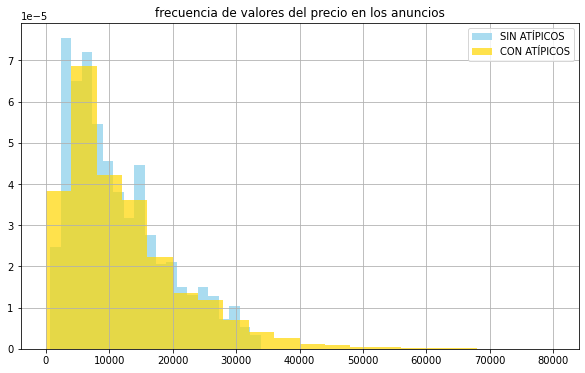

In [58]:
#usando los limites obtenidos en la sección anterior para aislar los valores atípicos
venta_vehiculos[venta_vehiculos['price'] <= lim_max_price]['price'].hist(bins=20, figsize=(10, 6), range=(lim_min_price, lim_max_price), alpha=0.7, density=True, label="SIN ATÍPICOS", color="skyblue")
#usando los limites obtenidos con los valores atípicos
venta_vehiculos[venta_vehiculos['price'] < 80000]['price'].hist(bins=20, figsize=(10, 6), range=(0, 80000), alpha=0.7, density=True, label="CON ATÍPICOS", color="gold")
plt.legend()
plt.title('frecuencia de valores del precio en los anuncios')
plt.show()

Existen muchos registros con el valor cero en la variable 'price', y un sesgo para valores mayores a 30,500. Por lo que es más haya del valor 30,500.

In [59]:
#examinemos Los años del vehículo cuando el anuncio se colocó
venta_vehiculos['año_vehiculo_anuncio'].describe()

count    51525.000000
mean         8.523590
std          6.153713
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: año_vehiculo_anuncio, dtype: float64

In [60]:
#calculo de los limites teóricos con quartiles para la variable cylinders
[lim_min_años_anun , lim_max_años_anun]= calcula_quartiles('año_vehiculo_anuncio', venta_vehiculos)

PRIMER QUARTILE:   4.0
TERCER QUARTILE:   12.0
RANGO INTERCUÁTIL: 8.0
LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE  año_vehiculo_anuncio :  24.0
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE  año_vehiculo_anuncio :  -8.0


In [61]:
#examinando los valores de la variable año_vehiculo_anuncio , menores cero.
negativos = venta_vehiculos.loc[venta_vehiculos['año_vehiculo_anuncio'] < 0]
negativos['año_vehiculo_anuncio'].value_counts

<bound method IndexOpsMixin.value_counts of Series([], Name: año_vehiculo_anuncio, dtype: int64)>

Por lo anterior ajustamos el limite inferior de la variable 'año_vehiculo_anuncio'

In [62]:
lim_min_años_anun = 0
print("LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE año_vehiculo_anuncio:", lim_max_años_anun)
print("LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE año_vehiculo_anuncio:", lim_min_años_anun)

LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE año_vehiculo_anuncio: 24.0
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE año_vehiculo_anuncio: 0


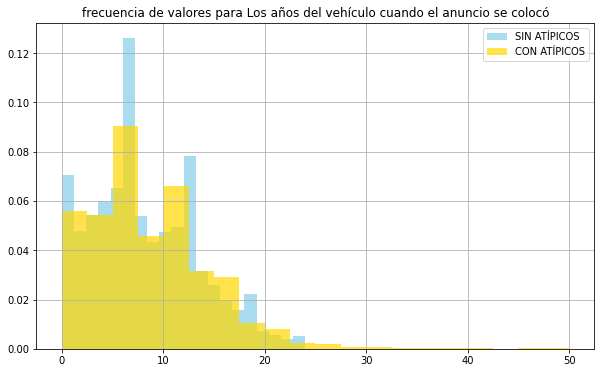

In [63]:
#usando los limites obtenidos en la sección anterior para aislar los valores atípicos
venta_vehiculos[venta_vehiculos['año_vehiculo_anuncio'] <= lim_max_años_anun]['año_vehiculo_anuncio'].hist(bins=20, figsize=(10, 6), range=(lim_min_años_anun, lim_max_años_anun), alpha=0.7, density=True, label="SIN ATÍPICOS", color="skyblue")
#usando los limites obtenidos con los valores atípicos
venta_vehiculos[venta_vehiculos['año_vehiculo_anuncio'] < 50]['año_vehiculo_anuncio'].hist(bins=20, figsize=(10, 6), range=(0, 50), alpha=0.7, density=True, label="CON ATÍPICOS", color="gold")
plt.legend()
plt.title('frecuencia de valores para Los años del vehículo cuando el anuncio se colocó')
plt.show()

Para los registros de la variable 'años del vehiculo partiendo del año que se anuncia', hay un sesgo para valores mayores a 25. Por lo que es necesario un análisis para determinar valores atípicos  más haya del valor de ese valor.

In [64]:
#examinemos la variable Millaje
venta_vehiculos['millaje_promedio'].describe()

count     51525.000000
mean      16949.079250
std       12774.703212
min           0.000000
25%       10083.466667
50%       14625.000000
75%       20766.333333
max      279365.000000
Name: millaje_promedio, dtype: float64

Calculando los rangos quartílicos para diferenciar los valores típicos de los atípicos para la variable 'Millaje'.

In [65]:
#calculo de los limites teóricos con quartiles para la variable cylinders
[lim_min_mill , lim_max_mill]= calcula_quartiles('millaje_promedio', venta_vehiculos)

PRIMER QUARTILE:   10083.466666666667
TERCER QUARTILE:   20766.333333333332
RANGO INTERCUÁTIL: 10682.866666666665
LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE  millaje_promedio :  36790.63333333333
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE  millaje_promedio :  -5940.83333333333


In [66]:
#examinando los valores de la variable año_vehiculo_anuncio , menores cero.
negativos = venta_vehiculos.loc[venta_vehiculos['millaje_promedio'] < 0]
negativos['millaje_promedio'].value_counts

<bound method IndexOpsMixin.value_counts of Series([], Name: millaje_promedio, dtype: float64)>

In [67]:
lim_min_mill = 0
print("LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE millaje_promedio:", lim_max_mill)
print("LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE millaje_promedio:", lim_min_mill)

LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE millaje_promedio: 36790.63333333333
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE millaje_promedio: 0


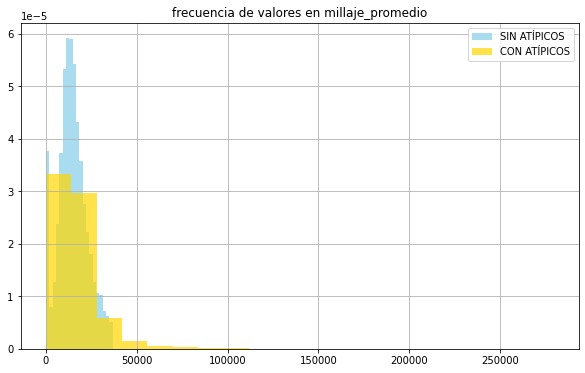

In [68]:
#usando los limites obtenidos en la sección anterior para aislar los valores atípicos
venta_vehiculos[venta_vehiculos['millaje_promedio'] <= lim_max_mill]['millaje_promedio'].hist(bins=20, figsize=(10, 6), range=(lim_min_mill, lim_max_mill), alpha=0.7, density=True, label="SIN ATÍPICOS", color="skyblue")
#usando los limites obtenidos con los valores atípicos
venta_vehiculos[venta_vehiculos['millaje_promedio'] < 279365]['millaje_promedio'].hist(bins=20, figsize=(10, 6), range=(0, 279365), alpha=0.7, density=True, label="CON ATÍPICOS", color="gold")
plt.legend()
plt.title('frecuencia de valores en millaje_promedio')
plt.show()

Para los registros de la variable 'millaje', hay un sesgo para valores mayores a 35000. Por lo que es necesario un análisis para determinar valores atípicos  más haya del valor de ese valor.

In [69]:
#examinemos la variable cylinders
venta_vehiculos['cylinders'].describe()

count    51525.000000
mean         6.121921
std          1.657534
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Puesto que la columna 'cylinders', maneja valores discretos, no es muy indicativo usar los quartiles para trazar gráficas.

<AxesSubplot:title={'center':'frecuencia de valores en cylinders'}>

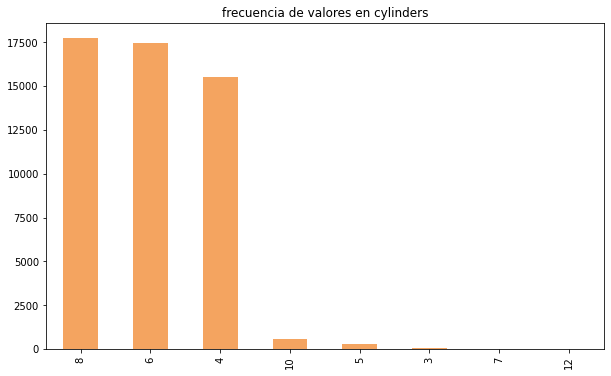

In [70]:
venta_vehiculos['cylinders'].value_counts().plot(kind='bar', figsize=(10, 6), 
                                                 title = 'frecuencia de valores en cylinders',
                                                color = 'sandybrown') 

Decidimos usar el gráfico de barras por ser mas descriptivo para la variable 'cylinders', que es discreta. Los valores predominantes es esta variable son tres de 8, 6, 4 cilindros los vehiculos que mas abundan en los datos cargados desde el Data Frame. Puesto que la columna 'cylinders', maneja valores discretos, no es muy indicativo usar los quartiles para trazar gráficas.

count         51525
unique            6
top       excellent
freq          24773
Name: condition, dtype: object

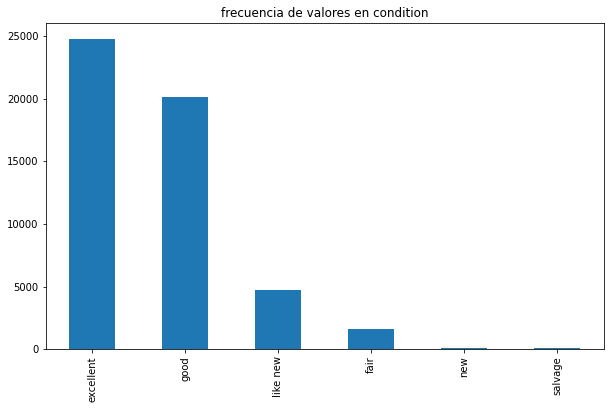

In [71]:
#examinemos la variable 'condition'
venta_vehiculos['condition'].value_counts().plot(kind='bar', figsize=(10, 6), 
                                                 title = 'frecuencia de valores en condition') 
venta_vehiculos['condition'].describe()

Decidimos usar el gráfico de barras por ser mas descriptivo para la variable 'conditon', que es cualitativa. Los valores predominantes es esta variable son tres de good y excellente, para los vehiculos que mas abundan en los datos cargados desde el Data Frame.

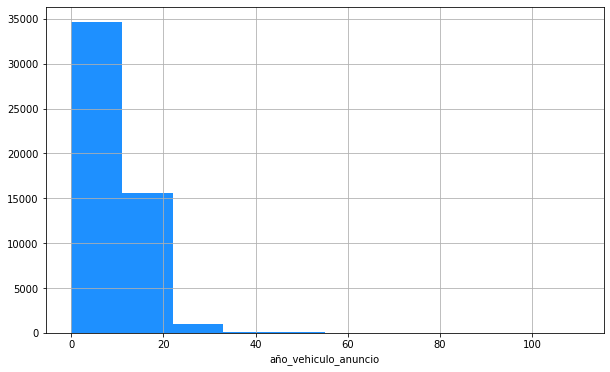

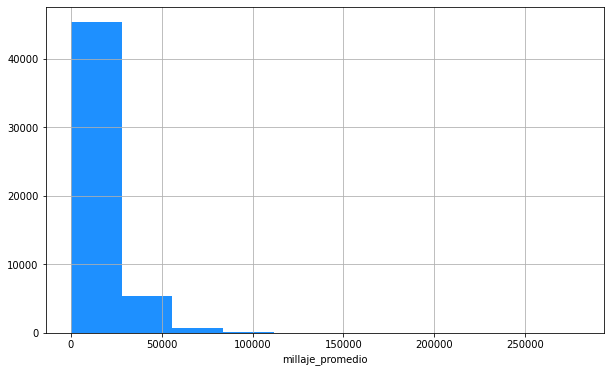

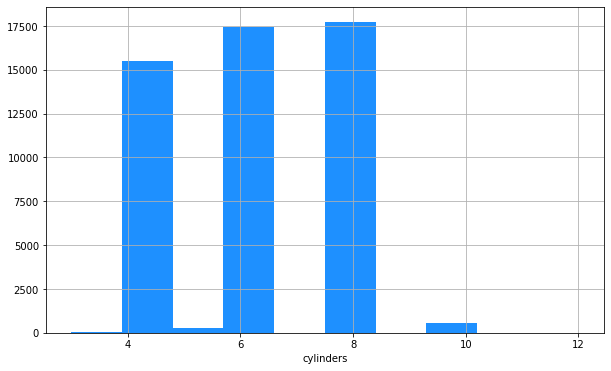

In [72]:
#una función para generar diagramas de barras
def traza_barr(lista, tabla):
    for var in lista:
        tabla[var].sort_values(ascending=False).hist(figsize=(10, 6), color='DodgerBlue')
        plt.xlabel(var)
        plt.show()
#automatizar la traza de las variables 
lista_variables = ['año_vehiculo_anuncio', 'millaje_promedio', 'cylinders']
traza_barr(lista_variables, venta_vehiculos)

<a id='indice8'></a>
# Estudiar y tratar valores atípicos

Con los histogramas anteriores, observamos qué columnas pueden contener valores atípicos son :
- Precio.
- Los años del vehículo cuando el anuncio se colocó.
- Millaje.
- cilindros.
- Estado.

Filtraremos en un DataFrame los considerados valores atípicos, usando los gráficos tipo boxplot. Con el uso de los diagramas podemos comprender de manera mas visual los valores de los rangos intercuártilicos.

(-5000.0, 40000.0)

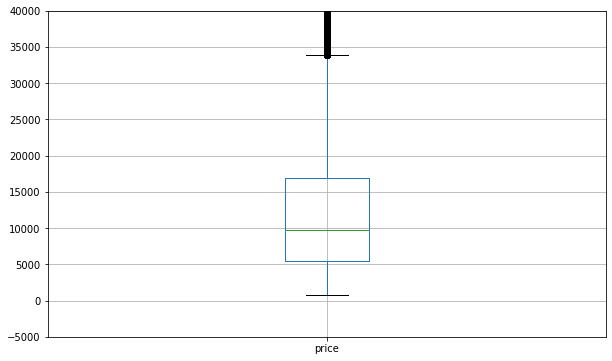

In [73]:
# Determina los límites para valores atípicos para la variable 'price'
venta_vehiculos.boxplot('price', figsize=(10, 6))
plt.ylim(-5000, 40000) # establece el rango para el eje vertical

In [74]:
#Examinemos los datos problemáticos de la variable price
venta_vehiculos['price'].value_counts()

14950.0    1019
6995.0      719
5995.0      655
7995.0      640
3500.0      630
           ... 
6785.0        1
41460.0       1
19996.0       1
29863.0       1
12792.0       1
Name: price, Length: 3343, dtype: int64

Hay demasiados datos en el valor price igual a 1 para considerar atípico ese valor. Pero el valor 37873 solo hay un registro; es uno de los valores atípicos.

(-5.0, 30.0)

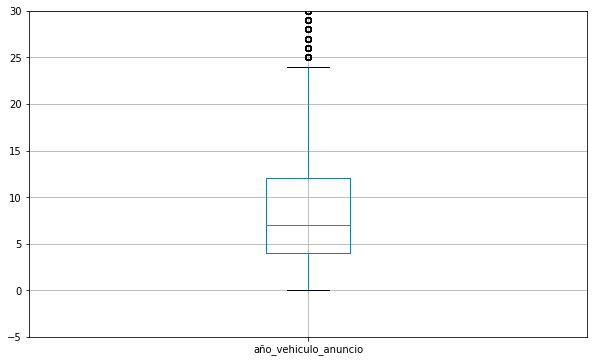

In [75]:
# Determinar los límites de los valores atípicos para la variable 'Los años del vehículo cuando el anuncio se colocó'
venta_vehiculos.boxplot('año_vehiculo_anuncio', figsize=(10, 6))
plt.ylim(-5, 30)  #establece el rango para el eje vertical

(-10000.0, 50000.0)

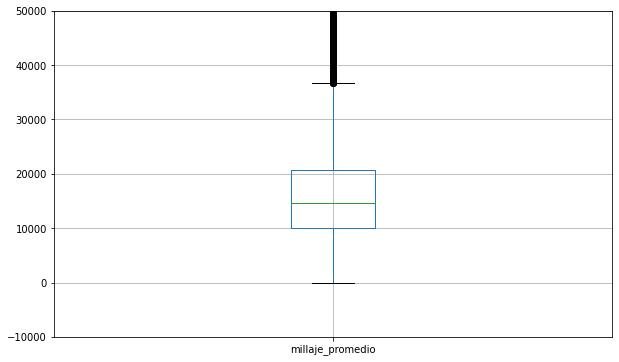

In [76]:
# Determinar los límites de los valores atípicos para la variable 'Los años del vehículo cuando el anuncio se colocó'
venta_vehiculos.boxplot('millaje_promedio', figsize=(10, 6))
plt.ylim(-10000, 50000)  #establece el rango para el eje vertical

(0.0, 14.0)

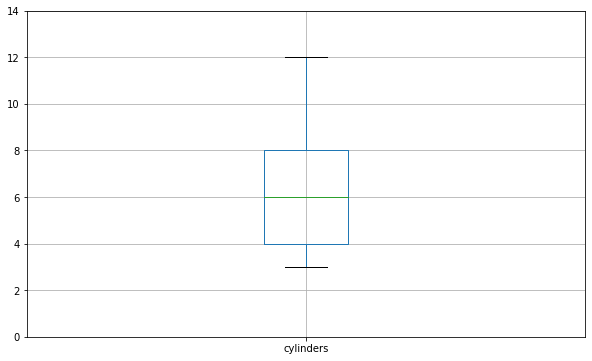

In [77]:
# Determinar los límites de los valores atípicos para la variable cilindros
venta_vehiculos.boxplot('cylinders', figsize=(10, 6))
plt.ylim(0, 14)  #establece el rango para el eje vertical

(0.0, 5.0)

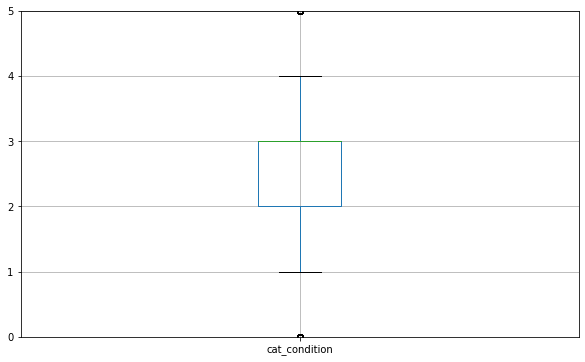

In [78]:
# Determinar los límites de los valores atípicos para la variable cilindros
venta_vehiculos.boxplot('cat_condition', figsize=(10, 6))
plt.ylim(0, 5)  #establece el rango para el eje vertical

Observando los gráficos anteriores y con la información de sus rangos intercuartílicos. Vamos a fijar los limites superiores para filtrar en un data frame auxiliar sin valores atípicos.Pero debemos ser graduales en la cantidad de limites aplicadolos, en diversos segmentos de busqueda. Si no lo hacemos de una manera graduada la aplicación de los limites de una sola busqueda, corremos mucho riesgo de eliminar de datos inecesaria  modificando las propiedades de todo el conjunto de datos. 

In [79]:
# Almacena los datos sin valores atípicos en un DataFrames por separado
sin_atipicos_precio = venta_vehiculos.query('price < @lim_max_price')
sin_atipicos_anuncio = venta_vehiculos.query('price < @lim_max_price and año_vehiculo_anuncio < @lim_max_años_anun')
sin_atipicos_millaje = venta_vehiculos.query('price < @lim_max_price and millaje_promedio < @lim_max_mill')
sin_atipicos_cilindro = venta_vehiculos.query('price < @lim_max_price and  cylinders < @lim_max_cyl')
sin_atipicos_condicion = venta_vehiculos.query('price < @lim_max_price and cat_condition < 5')

A continuación se realizará una ispección para comparar la cantidad de datos imputados por cada uno de las búsquedas direccionadas para aplicar los filtros sobre los datos atípicos de cada variable.

In [80]:
print('PORCENTAJE DE LOS REGISTROS SIN DATOS ATÍPICOS FRENTE A LOS DATOS COMPLETOS')
print('PARA LA VARIABLE price:                ', "{: .2%}".format(len(sin_atipicos_precio)/len(venta_vehiculos)))
print('PARA LA VARIABLE año_vehiculo_anuncio: ', "{: .2%}".format(len(sin_atipicos_anuncio)/len(venta_vehiculos)))
print('PARA LA VARIABLE millaje_promedio:     ', "{: .2%}".format(len(sin_atipicos_millaje)/len(venta_vehiculos)))
print('PARA LA VARIABLE cylinders:            ', "{: .2%}".format(len(sin_atipicos_cilindro)/len(venta_vehiculos)))
print('PARA LA VARIABLE cat_condition:        ', "{: .2%}".format(len(sin_atipicos_condicion)/len(venta_vehiculos)))

PORCENTAJE DE LOS REGISTROS SIN DATOS ATÍPICOS FRENTE A LOS DATOS COMPLETOS
PARA LA VARIABLE price:                  96.47%
PARA LA VARIABLE año_vehiculo_anuncio:   94.79%
PARA LA VARIABLE millaje_promedio:       91.29%
PARA LA VARIABLE cylinders:              96.47%
PARA LA VARIABLE cat_condition:          96.28%


Ninguno de nuestro filtros es menor del 70 porciento, lo cual es aceptable para continuar con el análisis; debido a que conservamos gran cantidad de los datos de el conjunto principal.

<a id='indice9'></a>
# Estudiar parámetros principales sin valores atípicos

Utilizaremos los datos filtrados para plantear nuevos histogramas. Para comparar con los histogramas anteriores y sus valores atípicos incluidos.Guiandosé por la gráficas tipo boxplot las cuales nos revelan visualmente los parametros de configuración de los quartiles, podemos definir los limites para aislar los valores atípicos.

count    49704.000000
mean     11323.541908
std       7535.764078
min        700.000000
25%       5300.000000
50%       9000.000000
75%      15750.000000
max      33858.000000
Name: price, dtype: float64

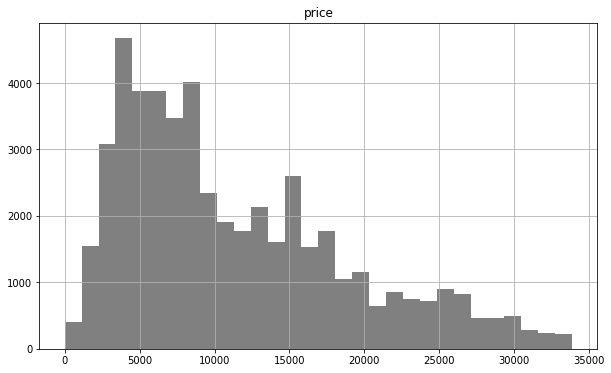

In [81]:
#examinemos la variable de price con filtro
sin_atipicos_precio.hist('price', bins=30, range=(0, sin_atipicos_precio['price'].max()), figsize=(10, 6), color ='grey')
sin_atipicos_precio['price'].describe()

Para el caso de la variable 'price' se tiene un sesgo a la derecha. Lo que indica que la mediana es menor que la media. Exite una gran cantidad de datos en la cercanía del cero. Se observa una cierta tendencia inversa proporcional entre estas variables.

count    48838.000000
mean         8.314714
std          5.079874
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         23.000000
Name: año_vehiculo_anuncio, dtype: float64

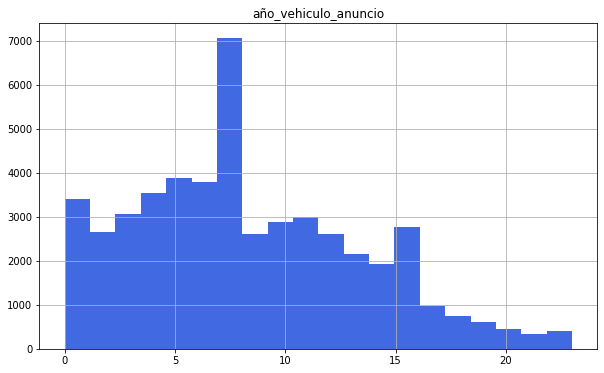

In [82]:
#examinemos Los años del vehículo cuando el anuncio se colocó con filtro
sin_atipicos_anuncio .hist('año_vehiculo_anuncio', bins=20, 
                  range=(0, sin_atipicos_anuncio['año_vehiculo_anuncio'].max()), 
                  figsize=(10, 6), color = 'RoyalBlue')
sin_atipicos_anuncio ['año_vehiculo_anuncio'].describe()

Se siguen teniendo muchos datos en cercanía del cero. Se observa una cierta tendencia inversa proporcional entre estas variables.

count    47035.000000
mean     14908.000109
std       7722.698470
min          0.000000
25%      10000.000000
50%      14181.818182
75%      19384.600000
max      36779.250000
Name: millaje_promedio, dtype: float64

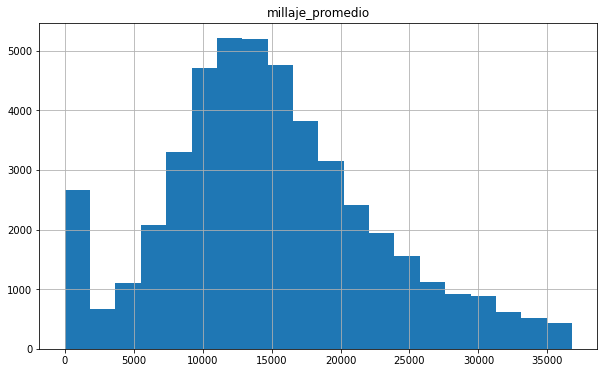

In [83]:
#examinemos la variable Millaje
sin_atipicos_millaje .hist('millaje_promedio', bins=20,
                  range=(0, sin_atipicos_millaje['millaje_promedio'].max()), 
                  figsize=(10, 6))
sin_atipicos_millaje ['millaje_promedio'].describe()

Nuevamente tenemos muchos datos que lucen raros, pues hay una gran cantidad de información en la cercanía del cero. Aunque esto se puede explicar si el auto esta en buenas condición ó incluso si el modelo es muy reciente. Se observa una cierta tendencia inversa proporcional entre estas variables.

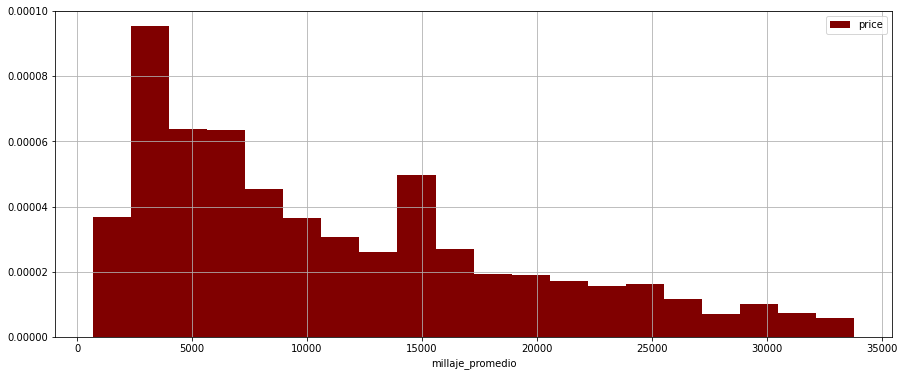

In [84]:
#examinando valores mas cercanos a cero en la variable millaje_promedio
sin_atipicos_millaje[sin_atipicos_millaje["millaje_promedio"] < 10292.606061]["price"].hist(figsize=(15, 6), bins=20, density=True, label="price", color= 'maroon')
plt.legend()
plt.xlabel('millaje_promedio')
plt.show()

Podemos distinguir claramente en la gráfica de arriba, que hay distribución en los valores de precio frente a la variable millaje_promedio. Por lo que no existe una acumulación extraña alrededor del millaje cero. Se sigue observa una cierta tendencia inversa proporcional entre estas variables.

<a id='indice10'></a>
# Periodo de colocación de los anuncios.
Estudiando cuántos días los anuncios fueron mostrados (days_listed), nos dará una idea de cuales fueron los vehiculos en el registro que más rapidamente se han vendido y con eso trazaremos diferentes gráficas para estudiar y buscar encontrar un patrón que logre explicar el origen de algúna correspondencia lineal con el precio del auto. 

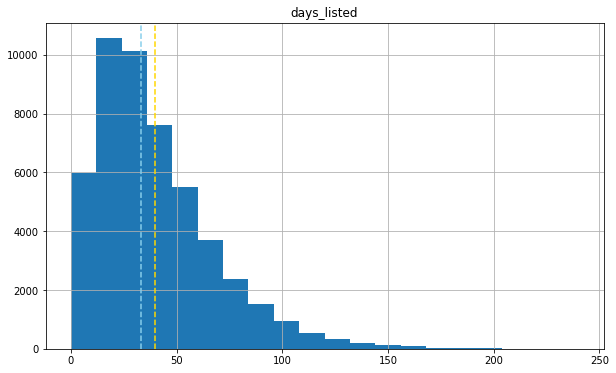

In [85]:
#observemos como se distribuye la frecuencia de la variable 'days_listed'
sin_atipicos_precio .hist('days_listed', bins=20, range=(0, 240), figsize=(10, 6))
plt.axvline(x=sin_atipicos_precio["days_listed"].median(), label = 'MEDIANA', color="skyblue", ls="--" )
plt.axvline(x=sin_atipicos_precio["days_listed"].mean(), label = 'MEDIA', color="gold", ls="--" )
plt.show()

Si hacemos una gráfica que nos muestre como se comporta la variable type frente a la variable days_listed, nos dará una idea de que tipo de vehiculos se venden mas pronto y cuales demora su venta.

In [86]:
print('EL VALOR DE LA MEDIANA EN DIAS LISTADOS PARA EL ANUNCIO: ', sin_atipicos_precio ["days_listed"].median())
print('EL VALOR DE LA MEDIA EN DIAS LISTADOS PARA EL ANUNCIO: ', sin_atipicos_precio ["days_listed"].mean())

EL VALOR DE LA MEDIANA EN DIAS LISTADOS PARA EL ANUNCIO:  33.0
EL VALOR DE LA MEDIA EN DIAS LISTADOS PARA EL ANUNCIO:  39.543577981651374


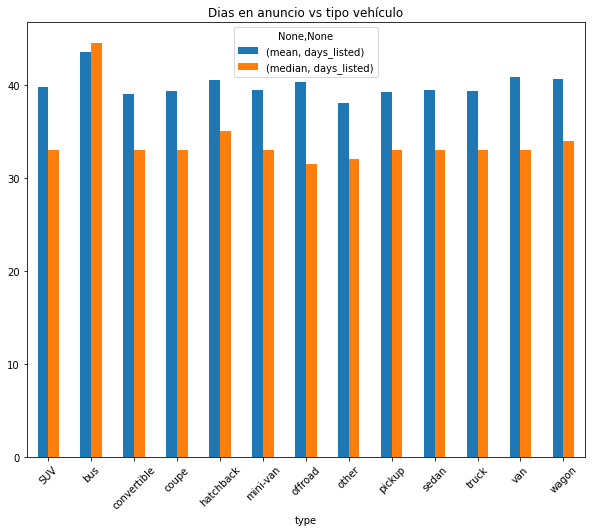

In [87]:
#usamos una tabla para agrupar por promedio y media de los valores de la columna 'days_listed' contra los 
#valores de la columna 'type'.
coloca_auncios = sin_atipicos_precio.pivot_table(index = 'type', values = 'days_listed', aggfunc = ['mean', 'median'])
#trazamos la información
coloca_auncios.plot(kind='bar', figsize=(10, 8),  title = 'Dias en anuncio vs tipo vehículo')
plt.xticks(rotation=45)
plt.show()

Los anucios que tienen menores días en promedio anunciando, son los del tipo convertible, pikup y mini-van. Esto puede indicar que son los que más se pueden ajustar a un tipo de precio óptimo, para la venta. Es decir el precio necesariamente valorado por el comprador y el vendedor, para ser de manera acelerada su compra-venta.

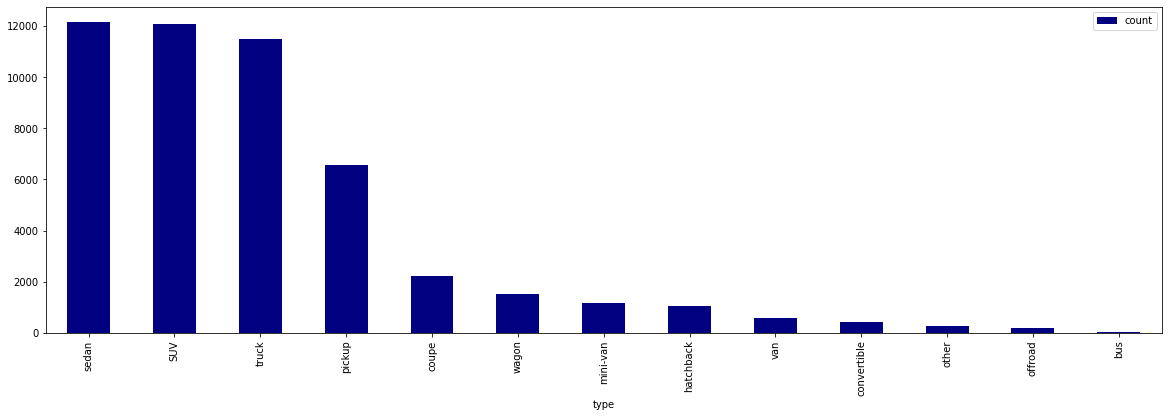

In [88]:
#Analizar el número de anuncios y el precio medio para cada tipo de vehículo.
analiza_precio_tipo = (
 sin_atipicos_precio 
 .groupby("type")["price"]
 .agg(["mean", "count"])
 .reset_index()
 .sort_values(by="count", ascending=False)
 .reset_index(drop=True)
)

analiza_precio_tipo.plot(kind="bar", x="type", y="count", figsize=(20, 6), color= 'navy')
plt.show()

Los anuncios mas númerosos provienen de vehículos tipo sedan,  SUV y truck. Los anuncios menos númerosos son los del tipo de automovíl bus.

In [89]:
sin_atipicos_precio .groupby("type")["price"].agg(
    ["mean", "count"]).reset_index().sort_values(by="count", ascending=False)

,type,mean,count
9,sedan,7283.281057,12147
0,SUV,10628.215210,12058
10,truck,15112.895021,11488
8,pickup,14458.133476,6563
3,coupe,13715.251688,2221
12,wagon,9022.952319,1531
5,mini-van,8032.415225,1156
4,hatchback,7161.300191,1046
11,van,9262.247039,591
2,convertible,12772.902613,421


In [90]:
#mostrando los valores de la tabla dinámica
coloca_auncios['mean'] ['days_listed'].sort_values(ascending=False)

type
bus            43.500000
van            40.864636
wagon          40.595036
hatchback      40.570746
offroad        40.257282
SUV            39.791093
sedan          39.421339
mini-van       39.416955
coupe          39.379559
truck          39.368384
pickup         39.227183
convertible    38.992874
other          38.055556
Name: days_listed, dtype: float64

In [91]:
#observando la distribución  de la columna 'days_listed'
sin_atipicos_precio ['days_listed'].describe()

count    49704.000000
mean        39.543578
std         28.196483
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Con la información del gráfico concluimos que el los valores de la columna 'type' con menos datos en la columna 'days_listed', son (convertible, 37.915916) y (other, 37.290909).
El tiempo estimado de venta según los datos generales de la variable 'days_listed' es de 39 días y la media es de 33 días.

(-25.0, 150.0)

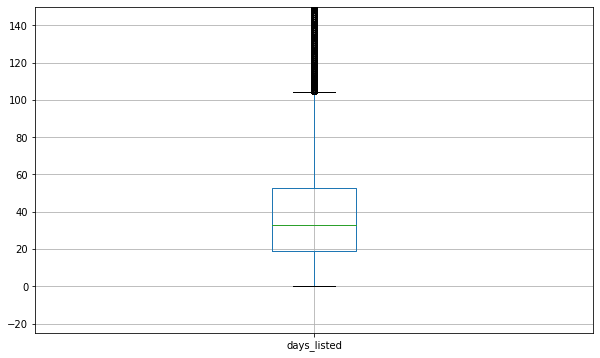

In [92]:
#graficando para observar el rango intercuartil de la columna 
sin_atipicos_precio .boxplot('days_listed', figsize=(10, 6))
plt.ylim(-25, 150)  #establece el rango para el eje vertical

Observando la anterior gráfica, afirmamos que valores para cuándo se eliminaron rápidamente los anuncios es del orden de 0 dias y cuándo son publicados por un tiempo anormalmente largo son de 101 días aproximadamente en adelante.

In [93]:
#calculo de los limites teóricos con quartiles para la variable price
[lim_min_lista , lim_max_lista]= calcula_quartiles('days_listed',sin_atipicos_precio)

PRIMER QUARTILE:   19.0
TERCER QUARTILE:   53.0
RANGO INTERCUÁTIL: 34.0
LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE  days_listed :  104.0
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE  days_listed :  -32.0


Por ser un valor teórico tenemos  un limite inferior con valores negativos, podemos verificar si en realidad hay datos negativos en esta variable.

In [94]:
#examinando los valores de la variable price , menores cero.
negativos = sin_atipicos_precio .loc[sin_atipicos_precio ['days_listed'] < 0]
negativos['days_listed'].value_counts

<bound method IndexOpsMixin.value_counts of Series([], Name: days_listed, dtype: int64)>

Por tener ausencia de valores menores a cero, podemos redefinir los el limite inferior, usando:  1 como valor límite.

In [95]:
lim_min_lista = 1
print("LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE days_listed:", lim_max_lista)
print("LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE days_listed:", lim_min_lista)

LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE days_listed: 104.0
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE days_listed: 1


Filtramos este valor para los valores antes filtrados con lo que tendremos un data frame con centrados en la media de los días en que se considera que un anuncio permanecerá hasta la venta del auto ligado a esos anuncios. 

In [96]:
#procedamos a filtrar los datos por los limites encotrados para la variable days_listed
sin_atipicos_dias_anun  = sin_atipicos_precio .query('days_listed <= @lim_max_lista and days_listed >= @lim_min_lista ')
print('PORCENTAJE DE LOS REGISTROS SIN DATOS ATÍPICOS FRENTE A LOS DATOS COMPLETOS')
print('PARA LA VARIABLE price: ', "{: .2%}".format(len(sin_atipicos_dias_anun)/len(venta_vehiculos)))

PORCENTAJE DE LOS REGISTROS SIN DATOS ATÍPICOS FRENTE A LOS DATOS COMPLETOS
PARA LA VARIABLE price:   93.34%


Conservamos un porcentaje aún muy alto de los datos originales. Podemos continuar con el análisis.

Si tenemos un número de días alto en un anuncio puede ser indicativo de que el precio de dicho anuncio es muy elevado, a consideración del tipo de vehículo ofertado. De manera inversa poco tiempo en venta corto indica que el precio es considerado justo para el comprador ó puede ser que el vendedor esta necesitado de efectivo.

<a id='indice11'></a>
# Precio promedio por cada tipo de vehículo

Analizando el número de anuncios y el precio promedio para cada tipo de vehículo. Trazaremos un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo. Seleccionaremos los dos tipos con un mayor número de anuncios. Lo anterior con el objetivo de buscar que variable tenge gran influencia en el listado de anuncios frente al precio promedio del tipo de vehiculos. Para rastrear esto podemos usar una tabla dinámica entre el precio promedio y el tipo de vehiculo.

In [97]:
#realizamos una tabla dinámica para obtener los valores promedios de price pora la 
#variable type
precio_tipo = sin_atipicos_anuncio[['type', 'price']].groupby('type').agg(['mean', 'count'])
precio_tipo

price       
                     mean  count
type                            
SUV          10670.859843  11958
bus          18107.428571     21
convertible  13342.807692    338
coupe        13978.062035   2015
hatchback     7133.412979   1017
mini-van      8032.415225   1156
offroad      14286.342391    184
other        10492.369099    233
pickup       14711.977941   6392
sedan         7291.471444  12099
truck        15278.642055  11309
van           9298.105622    587
wagon         9031.353826   1529

Ahora con esta tabla auxiliar vamos a verificar la información para ubicar si existe correlación entre las columnas presentadas arriba.

In [98]:
# vamos a compara precio promedio contra número de anuncios
precio_tipo['price', 'count'].corr(precio_tipo['price', 'mean']) 

-0.06444260024856482

El índice expresa una cierta correlación lineal negativa muy debíl. Analizaremos por separado a las diversos tipos de vehículos.

<AxesSubplot:>

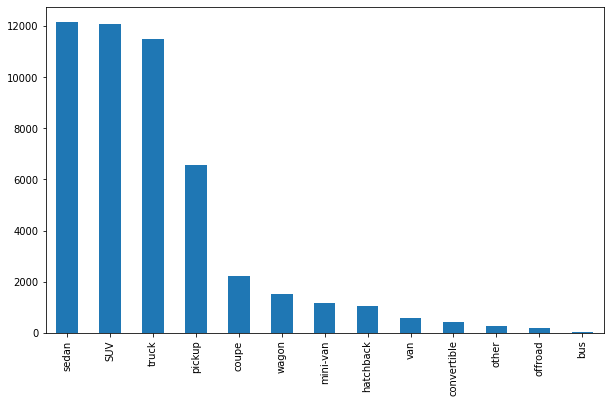

In [99]:
#diagrama de barras que indica los tipos de vehiculos con mas anuncios en el Data frame sin datos atípicos
sin_atipicos_precio['type'].value_counts().plot(kind='bar', figsize=(10, 6)) 

In [100]:
#los mas tipos de auto con más anuncios
most_adver_tipo = list(sin_atipicos_precio.head(3)["type"])
most_adver_tipo

['SUV', 'pickup', 'sedan']

Procedamos a retomar las otras variables que incluimos en la dinámica de compra y venta. Las personas que compran buscan proceder bajo los siguientes parámetros su busqueda; modelo, año del modelo, tipo, quizás número de cilíndros, condición y precio.

In [101]:
#Incorporemos en agrupación los valores de la declaración en el data frame
analisis_precio = sin_atipicos_anuncio.groupby(["model_year", "condition", "model",  
                                               "cylinders", "type" ] )['price'].agg(['median', 'mean', pd.Series.mode, 'count'])
analisis_precio

median  \
model_year condition model               cylinders type                   
1995       excellent chevrolet camaro    6         coupe         2895.0   
                                         8         coupe         3650.0   
                     chevrolet corvette  8         convertible   8500.0   
                                                   coupe         9500.0   
                     chevrolet silverado 8         pickup        3500.0   
...                                                                 ...   
2019       new       ram 1500            6         truck        22525.0   
                     subaru impreza      4         sedan        14500.0   
                     toyota camry        4         sedan        14950.0   
                     toyota corolla      4         sedan        18800.0   
           salvage   nissan sentra       4         sedan         4500.0   

                                                                   mean  \
model_year condition model               cylinders type                   
1995       excellent chevrolet camaro    6         coupe         2895.0   
                                         8         coupe         3650.0   
                     chevrolet corvette  8         convertible   8500.0   
                                                   coupe         9659.0   
                     chevrolet silverado 8         pickup        3500.0   
...                                                                 ...   
2019       new       ram 1500            6         truck        22525.0   
                     subaru impreza      4         sedan        14500.0   
                     toyota camry        4         sedan        14950.0   
                     toyota corolla      4         sedan        18800.0   
           salvage   nissan sentra       4         sedan         4500.0   

                                                                                                      mode  \
model_year condition model               cylinders type                                                      
1995       excellent chevrolet camaro    6         coupe                                            2895.0   
                                         8         coupe                                            3650.0   
                     chevrolet corvette  8         convertible                                      8500.0   
                                                   coupe        [7500.0, 8800.0, 9500.0, 10500.0, 11995.0]   
                     chevrolet silverado 8         pickup                                           3500.0   
...                                                                                                    ...   
2019       new       ram 1500            6         truck                                           22525.0   
                     subaru impreza      4         sedan                                           14500.0   
                     toyota camry        4         sedan                                           14950.0   
                     toyota corolla      4         sedan                                           18800.0   
           salvage   nissan sentra       4         sedan                                            4500.0   

                                                                count  
model_year condition model               cylinders type                
1995       excellent chevrolet camaro    6         coupe            3  
                                         8         coupe            1  
                     chevrolet corvette  8         convertible      1  
                                                   coupe            5  
                     chevrolet silverado 8         pickup           1  
...                                                               ...  
2019       new       ram 1500            6         truck            1  
                     subaru imprez

In [102]:
# vamos a compara precio promedio contra número de anuncios
analisis_precio['mean'].corr(analisis_precio['count'] ) 

0.11507221064694584

Tenemos indicios de una correlación lineal más significativa aunque sigue siendo debíl. Lo que indica que dentro del grupo, hay una variable que esta aportando una tendencia a una correspondencia lineal más fuerte. Con los datos mostrados en la tabla anterior, busquemos filtrar por la variable condición del auto.
Lo anterior es motivado por el hecho de que planteando un comprador una busqueda en los anuncios de autos, está persona puede iniciar por dar mucho mas valor en precio a vehículos con condición like new ó excellent y pagar mas en precio que sobre autos con condición good.
Trazaremos estos datos para visualizar como podrían los datos revelar una correlación más evidente.  

In [103]:
#Incorporemos en agrupación los valores de la declaración en el data frame
analisis_precio2 = sin_atipicos_anuncio.groupby(["condition"] )['price'].agg(['median', 'mean', pd.Series.mode, 'count'])
analisis_precio2

,median,mean,mode,count
condition,,,,
excellent,10900.0,12202.110719,14950.0,23519
fair,2750.0,3534.241096,2500.0,1460
good,7850.0,10418.089541,4995.0,19410
like new,12995.0,14202.044973,2599.0,4247
new,14550.0,14788.510638,14950.0,94
salvage,3500.0,4818.833333,800.0,108


In [104]:
#vamos a compara precio promedio contra número de anuncios
analisis_precio2['mean'].corr(analisis_precio2['count'] ) 

0.2726073705536262

El índice anterior expresa una correlación lineal positiva, debíl entre el precio promedio y el número de anuncios. Será interesante observar la traza de valores por los tipos de vehículos SUV, truck y sedan, que son los que más anuncios presentan y son los mejores para analizar posibles correlaciones frente a las variables como model_year, type, condition y cylinders. Cuando se da una gran demanada de un vehículo está hace se incremente el precio. Busquemos si existe una correlación, segmentando por tipo de vehículo.
 

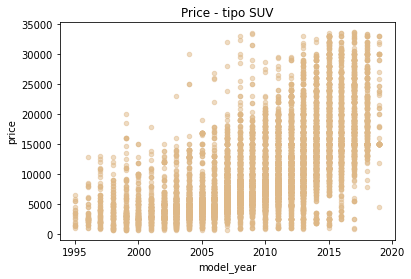

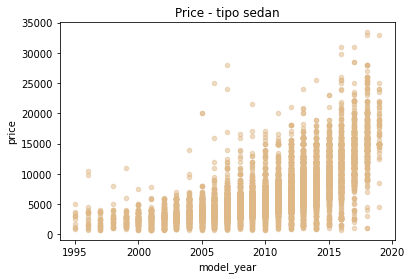

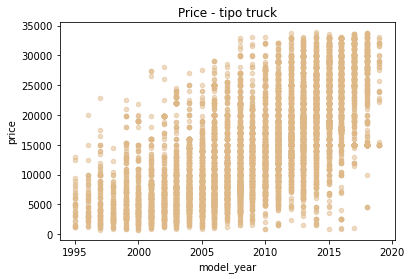

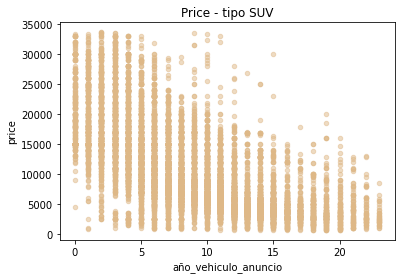

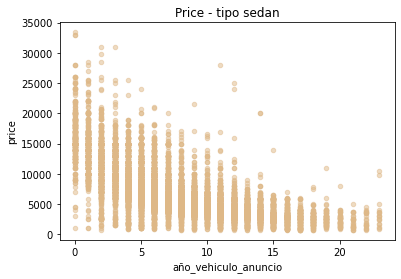

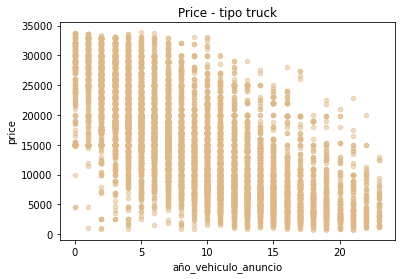

In [105]:
tipo = ['SUV', 'sedan', 'truck']
var = ["model_year", "año_vehiculo_anuncio"] 

for col in var:
    for estilo in tipo:
        sin_atipicos_anuncio.loc[sin_atipicos_anuncio["type"] == estilo].plot(kind="scatter", x=col, y="price", title = ('Price - tipo ' + estilo),  alpha= 0.5, color ='burlywood')

Por lo que podemos entender, de las variables que presenta correlación lineal son: model_year en correlación positiva, año_vehiculo_anuncio en correlación negativa. 

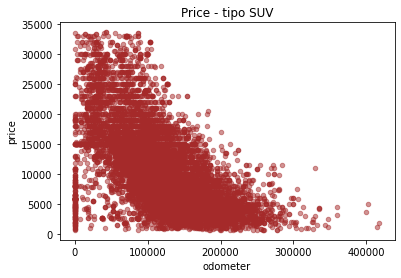

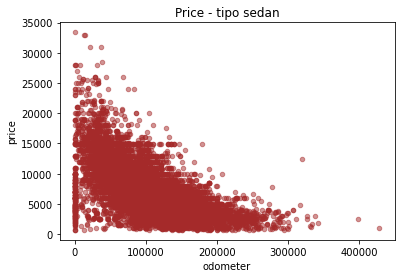

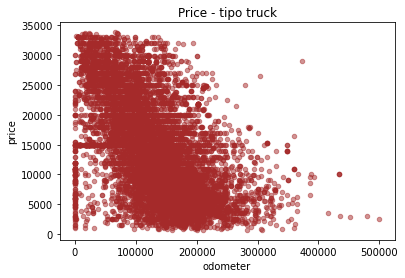

In [106]:
tipo = ['SUV', 'sedan', 'truck']
var = "odometer"
for estilo in tipo:
    sin_atipicos_millaje.loc[sin_atipicos_millaje["type"] == estilo].plot(kind="scatter", x=var, y="price", title = ('Price - tipo ' + estilo), alpha = 0.5, color = 'brown'  )

Con la variable odometer existe cierta evidencia de correlación lineal negativa.

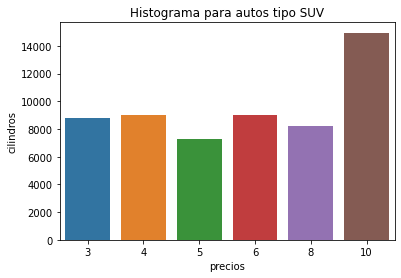

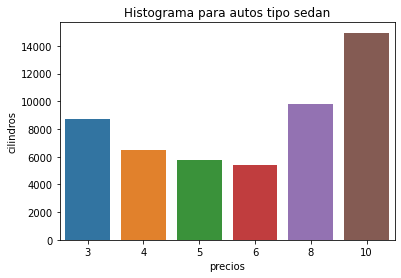

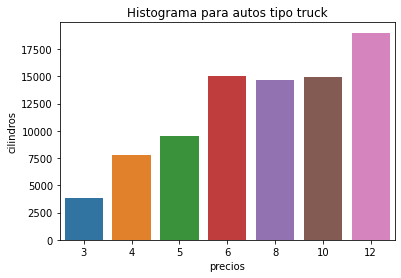

In [107]:
#trazado de la variable cylinders frente a la variable price
tipo = ['SUV', 'sedan', 'truck']
def crea_dataFrame (filtro):
    return sin_atipicos_cilindro.loc[sin_atipicos_cilindro["type"] == filtro].pivot_table(index = 'cylinders', values = 'price', aggfunc= 'median')

for estilo in tipo:
    data2 = crea_dataFrame (estilo)
    sns.barplot(x=data2.index, y=data2['price'])
    plt.title('Histograma para autos tipo ' + estilo)
    plt.xlabel('precios')
    plt.ylabel('cilindros')
    plt.show()  

In [108]:
for estilo in tipo:
    data2 = crea_dataFrame (estilo)
    

En las variable cilindros no existe una correlación evidente aunque parece más bien una relación con una distribución
de una forma normal pues es una variable discreta. Lo que evidencia una tendencia a solicitar por la abundancia de datos a los datos con cilindros de 6 ó 8 no influyendo el precio para esto.

<a id='indice111'></a>
## Conclusión sobre el precio promedio.
El precio promedio sobre el tipo de vehículo no es determinante en el número de anuncios. Por lo que podemos afirmar que un gran número de anuncios de un tipo de vehículo no disminuira de manera significativa su precio. Aunque es mas determinante en el incremento del precio el año del modelo del auto entre más reciente, mas precio. Por lo contrario entre mas precio menos millaje para el auto y también menos dias en anuncios.


<a id='indice12'></a>
# Factores de precio

Para rastrear factores que decisivamente impacten sobre el precio; Tomaremos cada uno de los tipos más populares que has detectado en la fase anterior y estudiaremos si el precio depende de la edad, millaje, condición, tipo de transmisión y color. 

Utilizaremos una matriz de correlación y diagramas de dispersión, usando los datos filtrados.

In [109]:
#matriz de correlación para el data frame sin datos atípicos
sin_atipicos_precio.corr()['price']

price                   1.000000
model_year              0.498112
cylinders               0.325558
odometer               -0.472003
is_4wd                       NaN
days_listed            -0.003760
mes_anuncio            -0.006384
dia_semana_anuncio      0.000706
año_anuncio             0.004687
año_vehiculo_anuncio   -0.496596
millaje_promedio        0.174199
cat_condition           0.226716
Name: price, dtype: float64

Las variables con mejor perspectiva de influencia lineal en la variable price son :
- `model_year            +0.569230`        
- `año_vehiculo_anuncio  -0.567710`	
- `odometer              -0.495931`
- `cylinders             +0.332654`

Analicemos con las siguientes variables categoricas el comportamiento de la variable price.

In [110]:
#verificar si hay suficientes datos en los valores de la variable transmission
sin_atipicos_precio.groupby("transmission")["price"].count()

transmission
automatic    45214
manual        2748
other         1742
Name: price, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

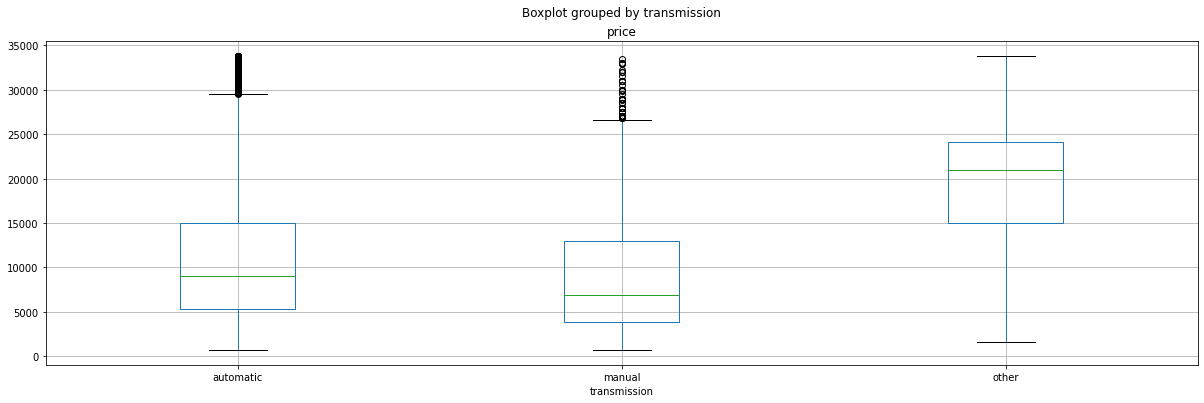

In [111]:
# para el caso de transmisión y color
sin_atipicos_precio.boxplot(column= 'price', by ='transmission', figsize=(20, 6))

Los valores predominantes en esta variable son: 'other', 'automatic'

In [112]:
#verificar si hay suficientes datos en los valores de la variable transmission
sin_atipicos_precio.groupby("paint_color")["price"].count()

paint_color
black                             7304
blue                              4395
brown                             1198
custom                            1136
green                             1385
grey                              4878
orange                             222
purple                             102
red                               4297
silver                            6123
the customer chooses the color    8948
white                             9472
yellow                             244
Name: price, dtype: int64

In [113]:
#discriminamos el valor de purple en la columna paint_color por no tener datos suficientes
sin_atipicos_precio = sin_atipicos_precio.query('paint_color != "purple"')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'black'),
  Text(2, 0, 'blue'),
  Text(3, 0, 'brown'),
  Text(4, 0, 'custom'),
  Text(5, 0, 'green'),
  Text(6, 0, 'grey'),
  Text(7, 0, 'orange'),
  Text(8, 0, 'red'),
  Text(9, 0, 'silver'),
  Text(10, 0, 'the customer chooses the color'),
  Text(11, 0, 'white'),
  Text(12, 0, 'yellow')])

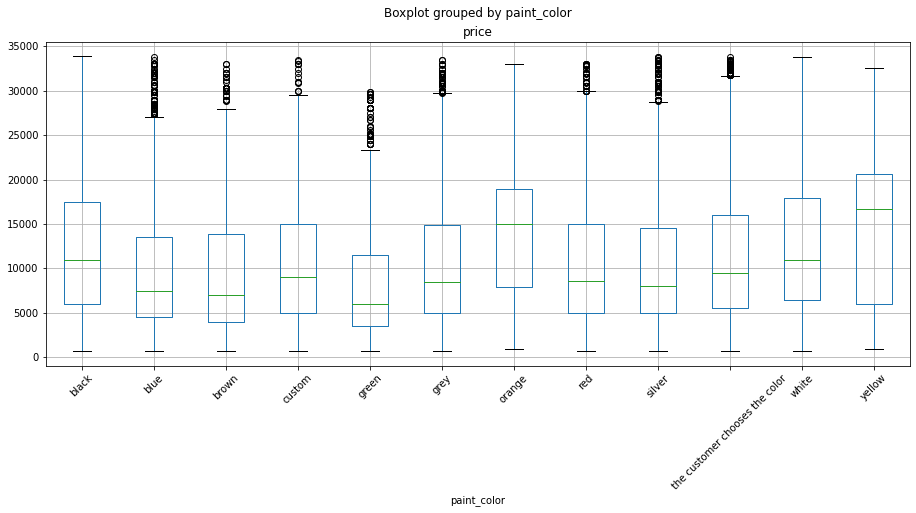

In [114]:
# para el caso de transmisión y color
sin_atipicos_precio.boxplot(column= 'price', by ='paint_color', figsize=(15, 6))
plt.xticks(rotation=45)

Los valores predominantes en esta variable son: 'orange', 'black', 'white', 'yellow'

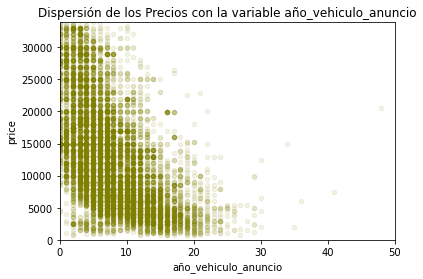

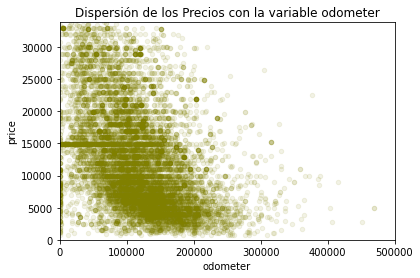

In [115]:
#una función para generar diagramas de dispersión
def traza_correlacion(lista, tabla, fijo):
    for var in lista:
        tabla.plot(x=var, y=fijo, kind='scatter', title= '', alpha=0.1, color = 'olive')
        if var =='año_vehiculo_anuncio':
            logx = 50
        else:
            logx = 500000
        plt.title('Dispersión de los Precios con la variable ' + var)  
        plt.xlim(0, logx)
        plt.ylim(0, tabla[fijo].max())
#automatizar la traza de las variables cualitativas usando los datos de los tipos :
#['SUV', 'sedan', 'truck']
tipos_auto_lider = sin_atipicos_precio.query("type == 'SUV' or type == 'sedan' or type == 'truck' ")
#automatizar la traza de las variables cualitativas usando los datos de el caso de  :
#una variable trasmisión con los valores ['other', 'automatic']
trans_corr_precio = tipos_auto_lider.query("transmission == 'automatic' or transmission == 'other'")
#una variable paint_color con los valores ['orange', 'black', 'white', 'yellow']
anuncios_corr_precio = trans_corr_precio.query("paint_color == 'orange' or paint_color == 'black' or paint_color == 'white' or paint_color == 'yellow'")
# realizamos la traza con los valores designados
lista_variables = ['año_vehiculo_anuncio', 'odometer']
traza_correlacion(lista_variables, anuncios_corr_precio, 'price')

In [116]:
#para realizar la traza de valores de la variable price frente
#a los valores de la variable condition, realizamos una tabla dinámica
data3 = anuncios_corr_precio.pivot_table(index = 'condition', values = 'price', aggfunc = 'median')
data3

,price
condition,
excellent,12500.0
fair,2900.0
good,8995.0
like new,14950.0
new,14775.0
salvage,4300.0


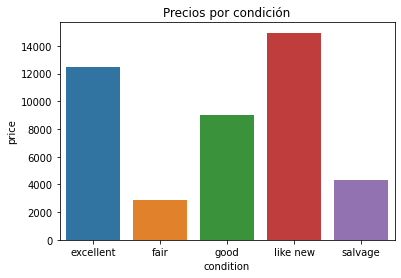

In [117]:
#usando los valores de la tabla construimos un diagrama de barras
precios=[12500.0,2900.0,8995.0,14950.0,4300.0]
condiciones =['excellent', 'fair', 'good', 'like new', 'salvage']
sns.barplot(x=condiciones, y=precios)
plt.title('Precios por condición')
plt.xlabel('condition')
plt.ylabel('price')
plt.show()

In [118]:
#matriz de correlación para el data frame con todos los parámetros
anuncios_corr_precio.corr()['price']

price                   1.000000
model_year              0.515198
cylinders               0.329299
odometer               -0.407408
is_4wd                       NaN
days_listed            -0.008008
mes_anuncio            -0.000697
dia_semana_anuncio     -0.003233
año_anuncio            -0.000198
año_vehiculo_anuncio   -0.513408
millaje_promedio        0.200358
cat_condition           0.235288
Name: price, dtype: float64

- `Existe fuerte correlación, para inferir que lo que el modelo reciente con los tipos SUV, sedan y truck recrean un incremento en el precio.`
- `Pero de manera inversa el millaje es un factor que decrementa el precio.`
- `Debido a que la parte mas sustantiva de un auto es su motor, en cuya única descripción en el DataFrame tenemos como referencia a la columna cylinders, el precio muestra cierta tendencia aumentar si tenemos un aumento en la cilindrada, pero solo en los valores 4 y 8. No hay evidencia que esto ocurra por falta de puntos para mayores cilindradas.`
- `mes_anuncio`

<a id='indice13'></a>
# Conclusión general  

1. Los valores ausentes en se imputarón exitosamente usando muestras de datos completos, del mismo DataFrame que reflejaban correspodencia con los datos llave usando las similitudes entre ambos grupos (datos completos frente datos ausentes) con la siguiente ruta de busqueda: modelo-tipo-condición-precio-año del modelo, para buscar con esta misma cadena una muestra con la misma cadena de busqueda en el otro grupo. Y así usando la media de estos para insertarla en los espacios vacios de los registros ausentes.
2. Los datos no presentan registros duplicados.
3. Se Corregen los tipos de datos de las columnas model_year', 'cylinders', 'is_4wd', 'date_posted' y 'days_listed'
4. Agregando factores adicionales a los datos para facilitar el análisis:

- `mes_anuncio`-mes en el que el anuncio se colocó.
- `dia_semana_anuncio`- día de la semana en el que el anuncio se colocó.
- `año_anuncio`- año en el que el anuncio se colocó.
- `año_vehiculo_anuncio`- los años del vehículo cuando el anuncio se colocó. 
- `millaje_promedio`- La media de millaje del vehículo por año.
5. Desde la conducta de un comprador buscara un tipo de vehículo y año de un modelo, dependiendo de su busqueda filtrará sus datos por un rango de precio. Desde la condición de una persona que vende, buscará los tipos de vehículos que son del año y del tipo de vehículo que pretende vender, para llenar su registro pondrán expecial atención en la captura de la variable condition, dependiendo de la busqueda que el observe compara su auto con los demás del registro y hace su captura de la variable price.
Está dinámica, nos permite inferir que entre las variable price, model_year, millaje, tipo junto con la variable condition.
6. Los datos con precios problemáticos se imputarón usando la categorización de las columnas price, odometer y condition.
7. Si una persona que busca hacer una compra y observa un anuncio y si considera el millaje alto comparando el año del vehiculo considera buscar otra opción del mismo año del vehiculo pero con un millaje inferior al que encontro por primera vista. Si un vendedor observa que su vehiculo se le contacta por varios compradores y le indican facilidades para probar el vehículo ofrecido, pensará el vendedor en buscar destacar en el apartado de estado que se encuentre en un estado venefíco para los compradores. 
8. Con esta dinámica tomada encuenta podemos indicar que será interesante observar la influencia de los variables del estado del vehículo , el millaje, el año del modelo (años del vehículo cuando el anuncio se colocó) y el precio.
9. Usando los histogramas, observamos qué columnas pueden contener valores atípicos son :
- `Precio.`
- `Los años del vehículo cuando el anuncio se colocó.`
- `Millaje.`
- `cilindros.`
- `Estado.`

Calculando los quartiles de las variables anteriores para obtener los valores máximos y mínimos para contener los datos típicos. 
10. Los anuncios mas númerosos provienen de vehículos tipo sedan,  SUV y truck. Los anuncios menos númerosos son los del tipo de automovíl bus.

11. Para valores tipicamente correctos en la variable days_listed:
-`limite superior: 104.`
-`limite inferior : 33.`

12. El precio promedio sobre el tipo de vehículo se determina frente al número de anuncios. Por lo que podemos afirmar que un gran número de anuncios de un tipo de vehículo no disminuira de manera significativa su precio. Aunque es mas determinante en el incremento del precio el año del modelo del auto entre más reciente, mas precio. Por lo contrario entre mas precio menos millaje para el auto y también menos dias en anuncios.
<a id='indice131'></a>
## Resumen.
- `Existe fuerte correlación, para inferir que lo que el modelo reciente con los tipos SUV, sedan y truck recrean un incremento en el precio.`
- `Pero de manera inversa el millaje es un factor que decrementa el precio.`
<a id='indice132'></a>
## Recomendaciones.
- `Si el vehículo es de modelo reciente el precio por porcentaje de venta puede aumentar favorablemente para la compañia.`
- `Sería importante que se tuviera una tabla que para ponderar el millaje del vehículo un millaje alto provocará una disminución en los puntos a favor del vendedor para ofertar un auto.`


[Volver a Contenidos](#back)

[Volver a Contenidos](#back)